Freaudulant activities is on the list of one of the most criminal activities existing in our world today Banking companies, credit card fraud detection team and retailers who distribute credit cards. According to data from 2015 to 2018 a total of $ 5,110,226 complaints have been submitted regarding fraud. Lets not forget to mention fraud complaints has increased by 10% from 38% in 2015 to 48% in 2018. Interest in cyber risk continues to grow as a result of high profile data breaches and awareness of almost endless range of exposures business face. The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Credit Card Fraud Detection involves modeling the card transactions using the transaction history based on the ones that turned out to be fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Hypothesis: Random Forest will display a higher model accuracy, precision and recall and out perform all other classification models. K-means will have an advantage during  clustering, separating classes, and better Silhouette score. Umap will create a better visualization of our data structure. As far as MLP Decision Tree will perform better and provide a better accuracy. 


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, because of confidentiality issues, the original features and more background information about the data are not present. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

For this project we will complete the following to get better prediction of Fraud activites.

Data exploration & visualization
Holdout (splitting data)

-Naive Bayes

-Decision tree model classification

     + gridsearchCV
     + Cross validation
     + Confusion matrix
     + Classification_report
-Random forest model classification

     + gridsearchCV
     + Cross validation
     + Confusion matrix
     + Classification_report
-KNN Classification

     + gridsearchCV
     + Cross validation
     + Confusion matrix
     + Classification_report
-Logistic Classification

     + gridsearchCV
     + Cross validation
     + Confusion matrix
     + Classification_report
     
-Boosting

The we will perform Dimensionality Reduction using:
    
PCA

t-NSE

UMAP

Then we will introduce Unsupervised Learning Models using:

K-Means

Hirarichal Clustering

DBSCAN

GaussianMixture

Finally we will apply Deep Learning models using:

Multi-Level-Perceptron

Convolutional Neural Network


In [1]:
#!pip install umap-learn
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sqlalchemy import create_engine
import warnings

LABELS = ["Normal", "Fraud"]

warnings.filterwarnings("ignore")

In [2]:
cc_df = pd.read_csv("creditcard.csv")
cc_df.head(9)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  

[9 rows x 31 columns]

In [3]:
# looking at the structure of the data frame
str(cc_df)

'            Time         V1         V2        V3        V4        V5  \\\n0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   \n1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   \n2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   \n3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   \n4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   \n...          ...        ...        ...       ...       ...       ...   \n284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   \n284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   \n284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   \n284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   \n284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   \n\n              V6        V7        V8        V9  ...       V21       V22  \\\n0       0.462388  0.239599  0.098698  0.363

In [4]:
cc_df.info()
cc_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [5]:
# checking for null values
cc_df.isnull().values.any()

False

# How are fraud compared to normal activites?

Distribuition of Normal(0) and Frauds(1):
0    284315
1       492
Name: Class, dtype: int64


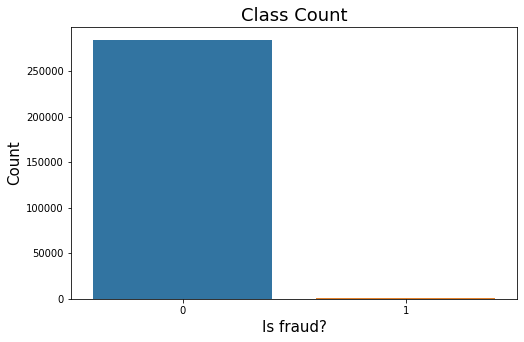

In [6]:
#Lets start looking at the difference between Normal and Fraud transactions
print("Distribuition of Normal(0) and Frauds(1):")
print(cc_df["Class"].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(cc_df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

Normal activities have more transactions than fraud activies as expected

In [7]:
# separating fraud and normal class
fraud = cc_df[cc_df['Class']==1]
normal = cc_df[cc_df['Class']==0]

In [8]:
#fraud shape
fraud.shape

(492, 31)

In [9]:
# normal shape
normal.shape

(284315, 31)

In [10]:
cc_df["Amount"]

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

# How are the amount of money used different between normal and fraud?

In [11]:
# majority
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
# minority
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The difference at mean, we notice normal spending is 88.00 and fraud at 122.00 with a 34.00 dollars difference. At 75 percent spending, fraud activitiese spend about 22 dollars more than normal. This makes sense because during fraud activities the user wants to spend the most they can before they are caught.

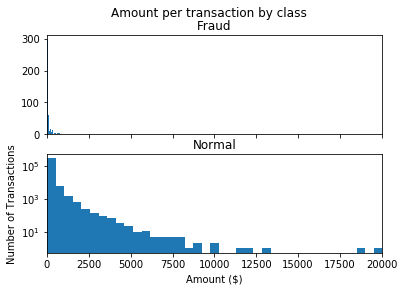

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

During fraud activites we see very little amount is being used compared to normal activites this makes sense. We can also see that just below  $2,500 are being spent during fraud activites because on average there are generally there are 10x more normal activites than fraud ones.

 # Do fraudulent transactions occur more often during certain time frame?


In [14]:
# We split time to minutes and hours to see the difference in transactions
timedelta = pd.to_timedelta(cc_df['Time'], unit='s')
cc_df['Time_in_mins'] = (timedelta.dt.components.minutes).astype(int)
cc_df['Time_in_hours'] = (timedelta.dt.components.hours).astype(int)

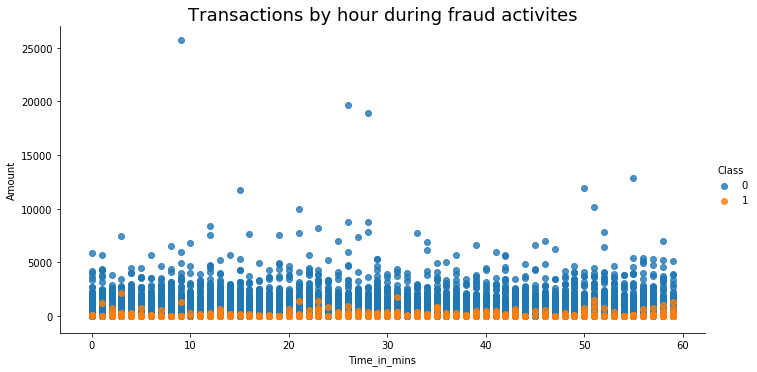

In [15]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_in_mins", fit_reg=False,aspect=2.0,
                data=cc_df, hue='Class')
plt.title("Transactions by hour during fraud activites",fontsize=18)
plt.show()

From our plot above we notice majority of fraud activities happen below 5,000 dollars. We see within the first 10 minutes there's more activities done at a higher rate and the most is spent with in the first 30 mins with a big spending between 2,000-4,000 The reason is to make that big purchases just incase the card is to be labled missing/stolen when the fraudaulent person is planning on making another purchase.

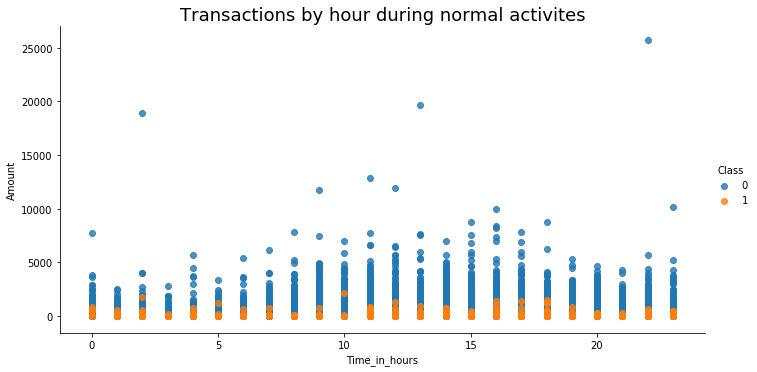

In [16]:
ax = sns.lmplot(y="Amount", x="Time_in_hours", fit_reg=False,aspect=2.0,
                data=cc_df, hue='Class')
plt.title("Transactions by hour during normal activites", fontsize=18)

plt.show()

The above shows majority of normal activites/spending usually occurs below 10,000 and there are usually long intervals. This makes sense because a customer would usually not go on a spending streek in a short amount of time. Customers would usually plan and shedule their spending instead of rushing being that they worked hard to earn it.

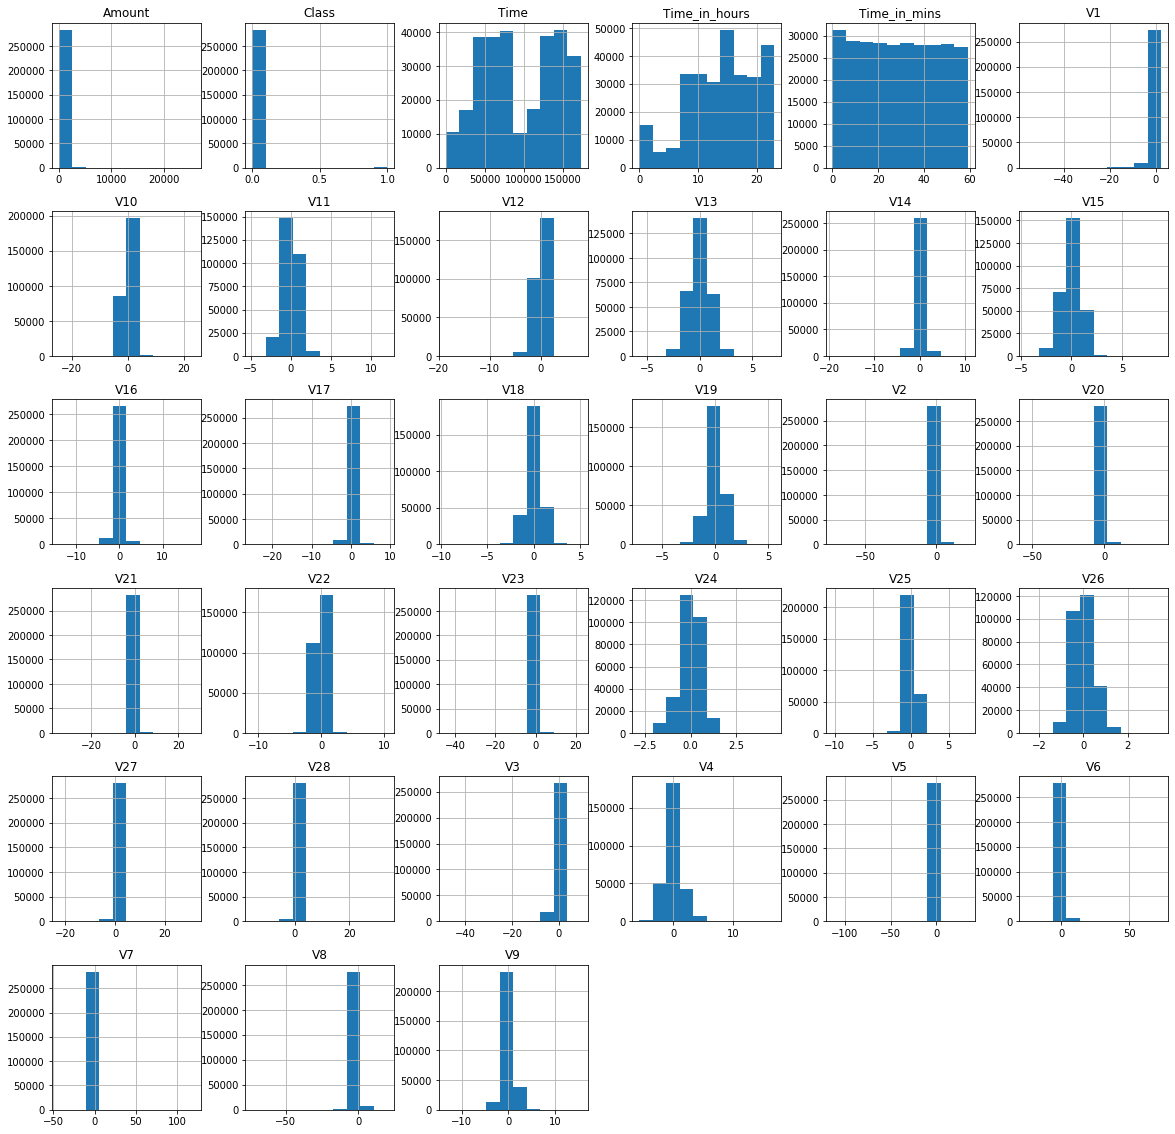

In [17]:
cc_df.hist(figsize=(20,20))
plt.show()

In [18]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

cc_df = cc_df[["Time_in_hours","Time_in_mins","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

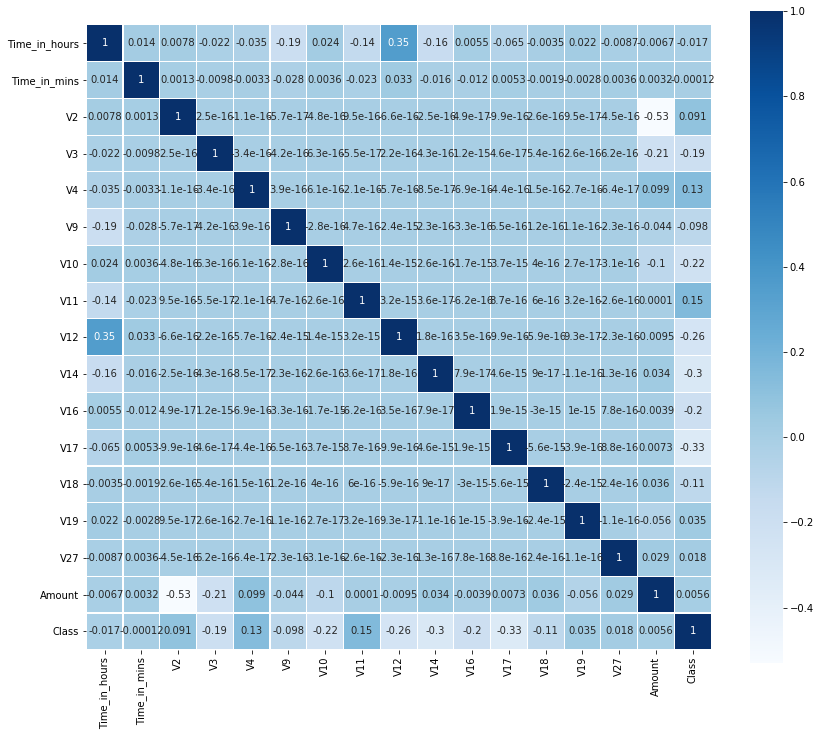

In [19]:
colormap = plt.cm.Blues

plt.figure(figsize=(14,12))

sns.heatmap(cc_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

# Preparing our data for Supervised Modeling

In [20]:
from sklearn.utils import resample

# Separate majority and minority classes
normal_majority = cc_df[cc_df.Class==0]
fraud_minority = cc_df[cc_df.Class==1]
 
# Downsample majority class
normal_majority_downsampled = resample(normal_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=6000,     # to match minority class
                                 random_state=123) # reproducible results
# len(normal_majority_downsampled)
# len(fraud_minority)


# # Combine minority class with downsampled majority class
downsample_df = pd.concat([normal_majority_downsampled, fraud_minority])
 
# # Display new class counts
normal_majority_downsampled.Class.value_counts()

## total data should equal to 12,000
# 6000 for both fraud and normal

0    6000
Name: Class, dtype: int64

In [21]:
# Separate majority and minority classes
normal_majority = cc_df[cc_df.Class==0]
fraud_minority = cc_df[cc_df.Class==1]
 
# Upsample minority class
fraud_minority_upsampled = resample(fraud_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
upsampled_df = pd.concat([normal_majority, fraud_minority_upsampled])

# Display new class counts
fraud_minority_upsampled.Class.value_counts()

# Name: balance, dtype: int64

1    6000
Name: Class, dtype: int64

In [22]:
merged_df = pd.concat([normal_majority_downsampled, fraud_minority_upsampled], ignore_index=True)
len(merged_df)

12000

In [23]:
cc_df["Time_in_hours"] = cc_df["Time_in_mins"].apply(lambda x: np.ceil(float(x)/3600)%24)

In [24]:
X=merged_df.drop("Class", axis=1)
y=merged_df["Class"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state = 42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
# x and y should be the same size fo visual

Training set has 9600 samples.
Testing set has 2400 samples.


In [27]:
merged_df.head()

Time_in_hours  Time_in_mins        V2        V3        V4        V9  \
0             23            43  0.261692  2.646536 -1.973014  1.111226   
1              8            15 -0.774080 -0.674991 -0.322871 -0.354142   
2             22            46  1.188389  1.308248  0.052384 -0.488491   
3              5            26  1.222904  1.859594 -0.318554  1.502836   
4             15            20  0.306862 -2.347355  1.144732 -0.308091   

        V10       V11       V12       V14       V16       V17       V18  \
0 -1.609648  0.226405  1.099892 -0.545792  0.085634 -0.720204  0.474164   
1  0.799470 -0.814812  0.685306 -0.326998 -1.482538 -0.152970  0.728147   
2 -0.528325 -0.109749  0.250109 -0.553822  0.354417 -0.028784 -0.214413   
3 -1.045793 -0.303395 -2.364608  1.164806 -0.063827  0.088554  0.659771   
4  0.253584 -0.158279  0.444811  0.987935 -1.817581  0.686020 -1.937979   

        V19       V27  Amount  Class  
0 -0.859268  0.253527   72.64      0  
1 -0.931708 -0.025385   35.29      0  
2 -0.092908  0.250678    0.99      0  
3  0.799583 -0.323105    2.12      0  
4 -1.453749  0.000524    1.00      0

In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def apply_classifier(clf,xTrain,xTest,yTrain,yTest, cross_validate=5):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Normal', 'Fraud']);
    axes[0].yaxis.set_ticklabels(['Normal', 'Fraud']);

    print("\n Classification report : \n {}".format(classification_report(y_test,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")
    
    # calculate AUC
    auc = roc_auc_score(yTest, predictions)
    print('AUC: %.3f' % auc)

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

# Below we take a look at the important aspects of the classification report.

Precision-is the ratio of correct positive predictions to the total predicted positives
A low precision means few of positive predictions are true.
A high precision means the algorithm returned substantally more relevany results than irrelevant ones.

Recall- also called sensetive probability. Its the ratio of correct positive predictions to total positive examples.
A low recall means most of the positive values were never predicted.
A high recall means algorothm returned most of the relevant results.

Accuracy- is the ratio of correctly predicted examples by the total examples.

ROC curve graph- shows the performance of a classification model at all classification thresholds.

AUC- provides an aggergate measure of performance accross all possible classification threshold.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

# Naive Bayes 


 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1236
           1       0.94      0.88      0.91      1164

    accuracy                           0.92      2400
   macro avg       0.92      0.91      0.92      2400
weighted avg       0.92      0.92      0.92      2400

Area under ROC curve :  0.9143520835418544 

AUC: 0.914


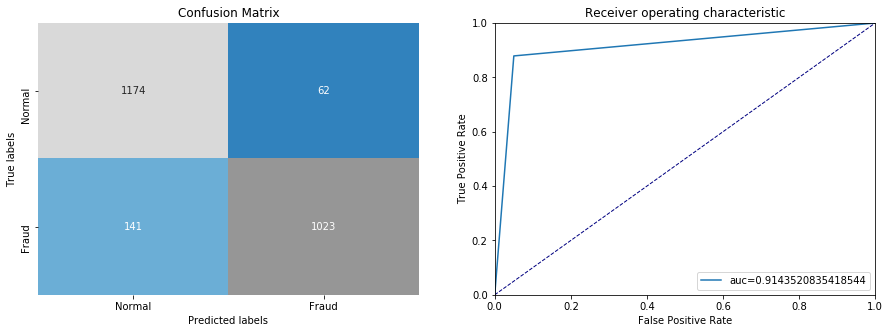

In [29]:
bernNB = BernoulliNB(binarize = True)
apply_classifier(bernNB, X_train, X_test, y_train, y_test)

For the Naive bayes we got anaccuracy of 91%, precision at 94% and recall at 88% score performing well without any tunning.


 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1236
           1       0.95      0.89      0.92      1164

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400

Area under ROC curve :  0.9256247289226971 

AUC: 0.926


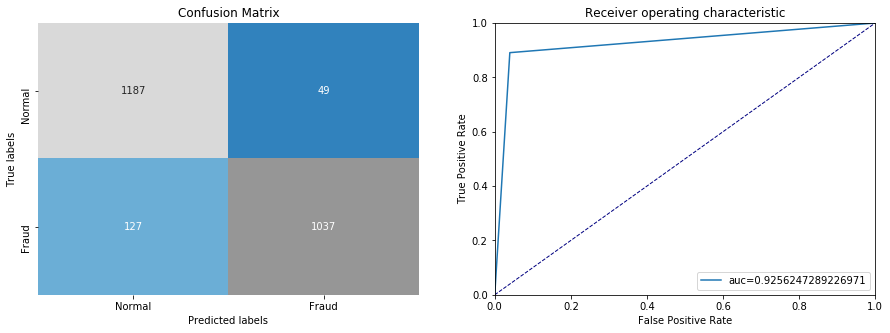

In [30]:
# Tunning naive bayes 
bernNB = BernoulliNB(binarize = 0.6)
apply_classifier(bernNB, X_train, X_test, y_train, y_test)

In [31]:
cv_scores = cross_val_score(bernNB, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.92552083 0.909375   0.91979167 0.93177083 0.90572917]
Mean cross validation score: 0.918


When we do a little bit of tuning and setting binarize to 0.6 we get score about 93%. The recall went higher by 1% indicating ratio of correct positive predictions to total positive examples. Overall A much better performance than the previous score.

# Logistic Regression Model


 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1236
           1       0.97      0.91      0.94      1164

    accuracy                           0.94      2400
   macro avg       0.95      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400

Area under ROC curve :  0.9414723250925833 

AUC: 0.941


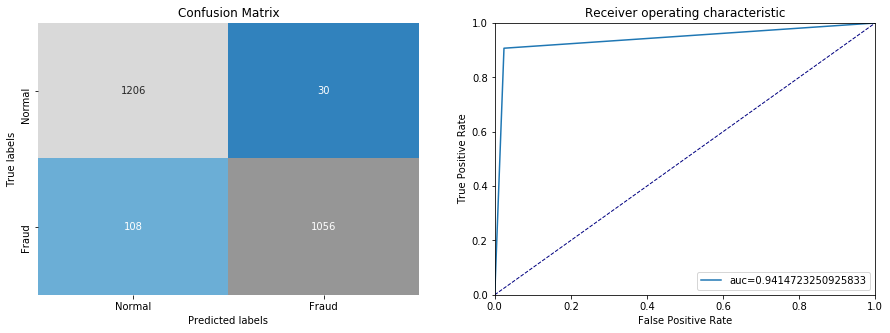

In [32]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

In [33]:
cv_scores = cross_val_score(logistic_reg, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.9390625  0.94010417 0.93802083 0.94270833 0.93333333]
Mean cross validation score: 0.939


Logistic Regression AUC-ROC scoring about 94%

Accuracy of 94%

fraud recall at 91%

fraud precision at 97%

We got a cross validation avarage score of about 94% this is very good for our model.

# Decision Tree Model


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1236
           1       0.98      1.00      0.99      1164

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400

Area under ROC curve :  0.9898867313915858 

AUC: 0.990


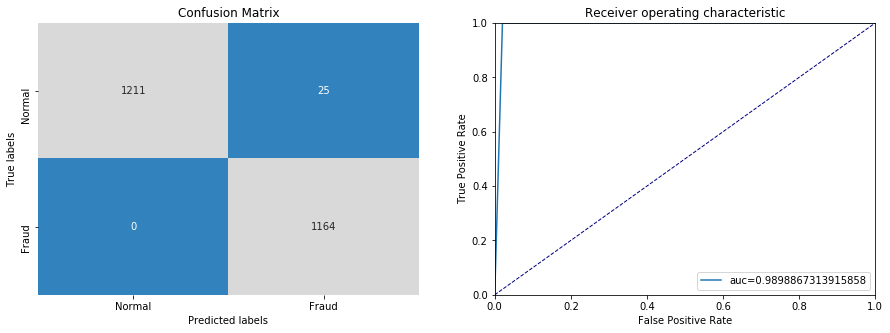

In [34]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)

In [35]:
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.99010417 0.99114583 0.99739583 0.99375    0.99010417]
Mean cross validation score: 0.992


Our Decision Tree Model has an  AUC-ROC scoring about of 99%

Accuracy of 99%

fraud recall at 100%

fraud precision at 98%

We got a cross validation avarage score of about 99% this is amazing good for our Decision Tree model.

Decision Tree shows 25 False Positive and 0 Fase Negative

# Random Forest Model


 Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1236
           1       1.00      0.97      0.99      1164

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400

Area under ROC curve :  0.9854452340439729 

AUC: 0.985


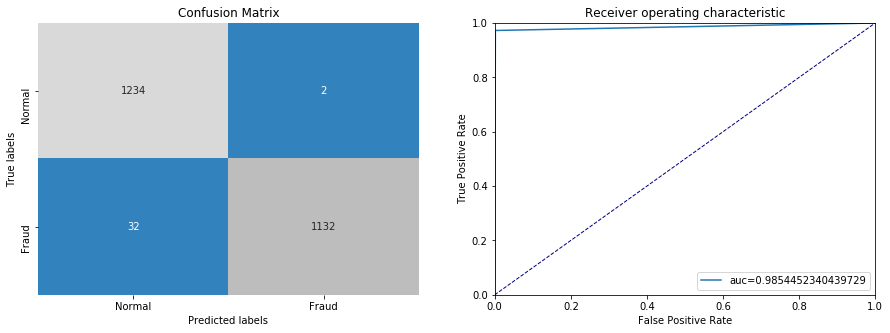

In [36]:
rand_forest_model = RandomForestClassifier(max_depth=8, random_state=0)
apply_classifier(rand_forest_model,X_train, X_test, y_train, y_test)

In [37]:
cv_scores = cross_val_score(rand_forest_model, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.9828125  0.9765625  0.975      0.98229167 0.97916667]
Mean cross validation score: 0.979


Our Random Forest model has an  Area under ROC curve scoring of about 98%

Accuracy of 98%


Recall for fraud is at 97%, Precision is at 100%

We got a cross validation avarage score of about 98% this is amazing with one percet lower than our Decision Treee model.

Random Forest shows 2 False Positive and 32 Fase Negative

# KNN Model 


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1236
           1       0.97      1.00      0.98      1164

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400

Area under ROC curve :  0.9846278317152103 

AUC: 0.985


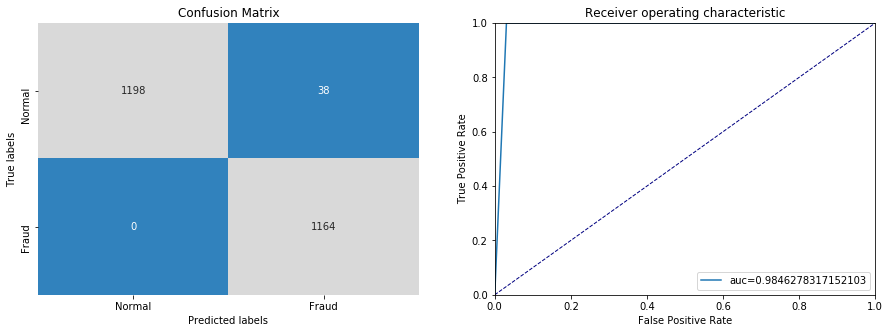

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
apply_classifier(knn_model,X_train, X_test, y_train, y_test)

In [39]:
cv_scores = cross_val_score(knn_model, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.9796875  0.97552083 0.978125   0.98125    0.97916667]
Mean cross validation score: 0.979


Our KNN model has an  Area under ROC curve scoring of 98%

Accuracy of 98%

fraud recall at 100%

fraud precision at 97%

We got a cross validation avarage score of 98% this is also amazing. We have an equal performance with the Random Forest model. Again we have the one percent lower than our Decision Treee model.

Our winner is the Decision Tree model at recall at 100% and precision at 98% an accuracy at 99% and cross validation average of 99%. Our second place is Random Forest with accuracy at, recall at 97%, precision at 100% and accuracy at about 99%. In third place is KNN with a AUC-ROC of 98.4% with recall at 100% and precision at 97%, In fourth place is our Random Forest model with an AUC-ROC scoring of 98.1% and a recall at 97% and precision at 100%.

# Tuning Parameters

In [40]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [4,6,8],
    "min_samples_split":[2,4,8],
    "class_weight" : ["balanced_subsample","balanced"]}
                     
KNeighbors_parameters = {
    "n_neighbors":[4,6,8,10],
    "weights": ["uniform", "distance"], 
    "algorithm": ["auto", "ball_tree","kd_tree"], 
    "leaf_size": [20,30,40,50], 
    "p": [1,2,3],
    "metric": ["euclidean"]
}

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def grid_search(clf,parameters,xTrain,yTrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc', cv = 5)
    grid_fit = grid_obj.fit(xTrain,yTrain)
    best_clf = grid_fit.best_estimator_

    return best_clf

# Tuned Logistic Regression Model


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1236
           1       0.98      0.90      0.94      1164

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400

Area under ROC curve :  0.9400585526974277 

AUC: 0.940


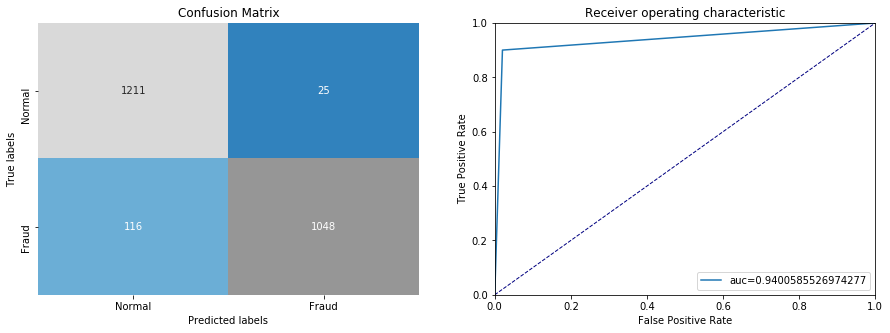

In [42]:
logReg_grid = grid_search(logistic_reg,LogReg_parameters,X_train,y_train)
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)

In [43]:
cv_scores = cross_val_score(logReg_grid, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.9375     0.9375     0.93958333 0.94114583 0.93333333]
Mean cross validation score: 0.938


Tuned Logistic Regression AUC-ROC scoring 94%. This is just about the same as our previous logistic regression model. Not much was changed after turning.

Accuracy of 94%

F1- socre accuracy of 94%

Recall for fraud is at 90%, Precision is at 98%

We got a cross validation avarage score of about 94%. After tuning we don't see much change in this model.

# Tuned Decision Tree Model


 Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1236
           1       0.96      0.97      0.97      1164

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400

Area under ROC curve :  0.9680253895172323 

AUC: 0.968


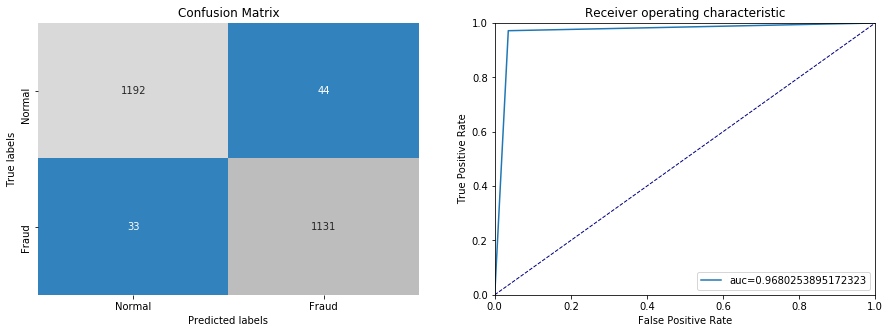

In [44]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train)
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)

In [45]:
cv_scores = cross_val_score(tree_grid, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.97239583 0.96875    0.9703125  0.9734375  0.97083333]
Mean cross validation score: 0.971


Our Tuned Decision Tree Model has an  AUC-ROC scoring about of 97% which is a decrease by 2%

Accuracy of 97% a decrease by 2%

F1- socre accuracy of 97% a decrease by 2

Recall for fraud is at 96%, Precision is at 97%

We got a cross validation avarage score of 97% which a decrease by 2% also. Overall we see a decrease in score.

# Tuned Random Forest Model


 Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1236
           1       1.00      0.97      0.99      1164

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400

Area under ROC curve :  0.9858497647883095 

AUC: 0.986


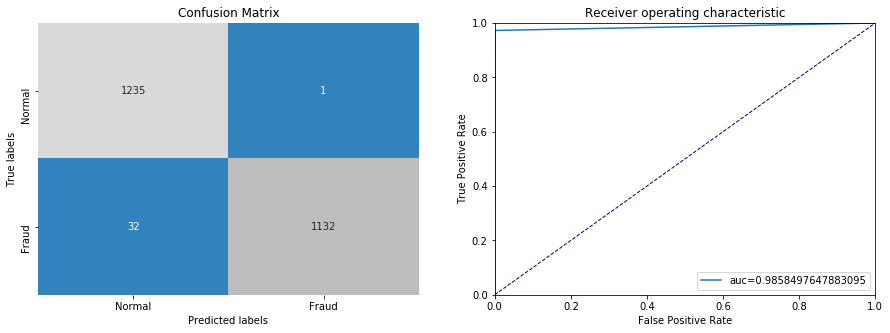

In [46]:
randomForest_grid = grid_search(rand_forest_model,RandomForest_parameters,X_train,y_train)
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

In [47]:
cv_scores = cross_val_score(randomForest_grid, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.99114583 0.978125   0.98229167 0.9859375  0.98385417]
Mean cross validation score: 0.984


Our Tuned Random Forest model has an  Area under ROC curve scoring of 99%

Accuracy of 99%

F1- socre accuracy of 99%

Recall art 97% and precision at 100%

We got a cross validation avarage score of about 100% this is as perfect from what we've seen thus far. Every aspect increased by 2% from 98% in our regular random forest model to 99% in our tuned random forest model. Perfect score. 

With 1 false positive and 32 false negative 

# Tuned KNN Model


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1236
           1       0.95      1.00      0.98      1164

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400

Area under ROC curve :  0.9761326860841424 

AUC: 0.976


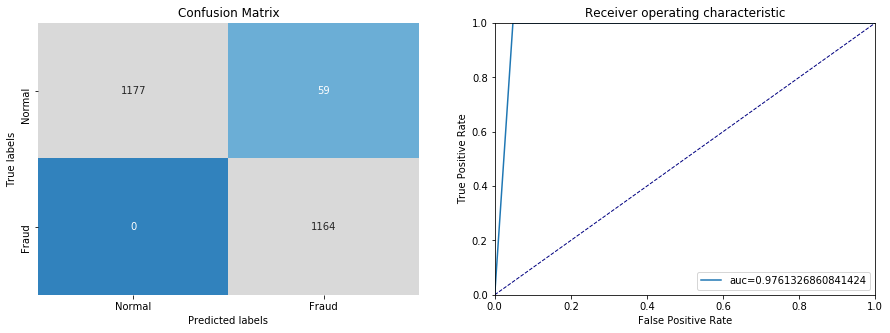

In [48]:
KNeighbors_grid = grid_search(knn_model,KNeighbors_parameters, X_train, y_train)
apply_classifier(KNeighbors_grid,X_train, X_test, y_train, y_test)

In [49]:
cv_scores = cross_val_score(KNeighbors_grid, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.96979167 0.96510417 0.96927083 0.9734375  0.97447917]
Mean cross validation score: 0.970


Our KNN model has an  Area under ROC curve scoring is about 98%

Accuracy of 98%

F1- socre accuracy of 98%

Recall for fraud is at 100%, Precision is at 95%

We got a cross validation avarage score about 98%. We do not see much changes in our Tuned KNN model.

# Boosting our Models


 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.98      0.98      1164

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400

Area under ROC curve :  0.9787683915523973 

AUC: 0.979


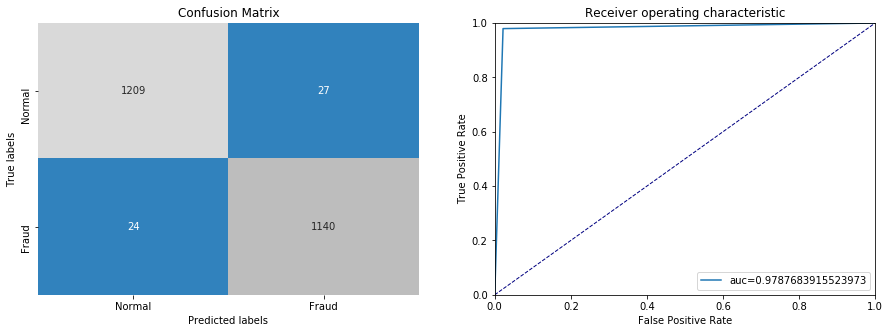

In [50]:
from sklearn.ensemble import AdaBoostClassifier
# lets see to boost our decision tree grid model
boost_model_tree = AdaBoostClassifier(base_estimator = tree_grid, n_estimators = 2)
apply_classifier(boost_model_tree,X_train, X_test, y_train, y_test)

In [51]:
cv_scores = cross_val_score(boost_model_tree, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.9828125  0.97447917 0.98020833 0.97760417 0.9765625 ]
Mean cross validation score: 0.978


After boosting we see our decision tree gridmodel did improve by 1% which is very good score about 98% accuracy. It perfomred better than the previous decision trees. Scoring 1% more than the tuned decision tree and score 1% less then our regular decision tree.


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1236
           1       0.98      0.90      0.94      1164

    accuracy                           0.94      2400
   macro avg       0.95      0.94      0.94      2400
weighted avg       0.95      0.94      0.94      2400

Area under ROC curve :  0.9417267207153104 

AUC: 0.942


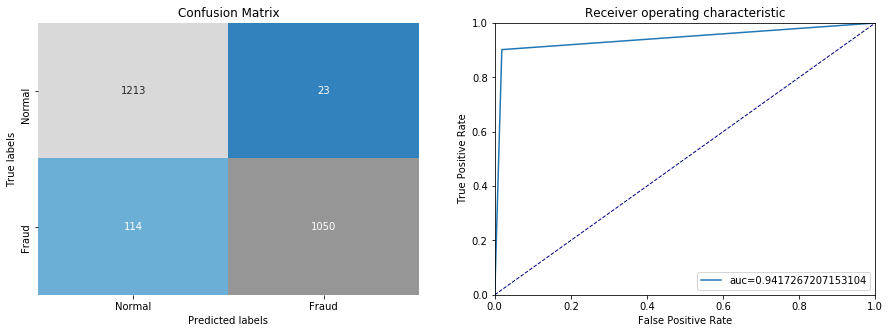

In [52]:
# lets see to boost our logistic grid search model
boost_model_logReg = AdaBoostClassifier(base_estimator = logReg_grid, n_estimators = 6)
apply_classifier(boost_model_logReg,X_train, X_test, y_train, y_test)

boosting the logistic regression model we did not see any changes. Accuracy still stits at 94%. overall same performance as the regular logistic regression and the tunned logestic regression model. We would not choose this model for our classification selection.

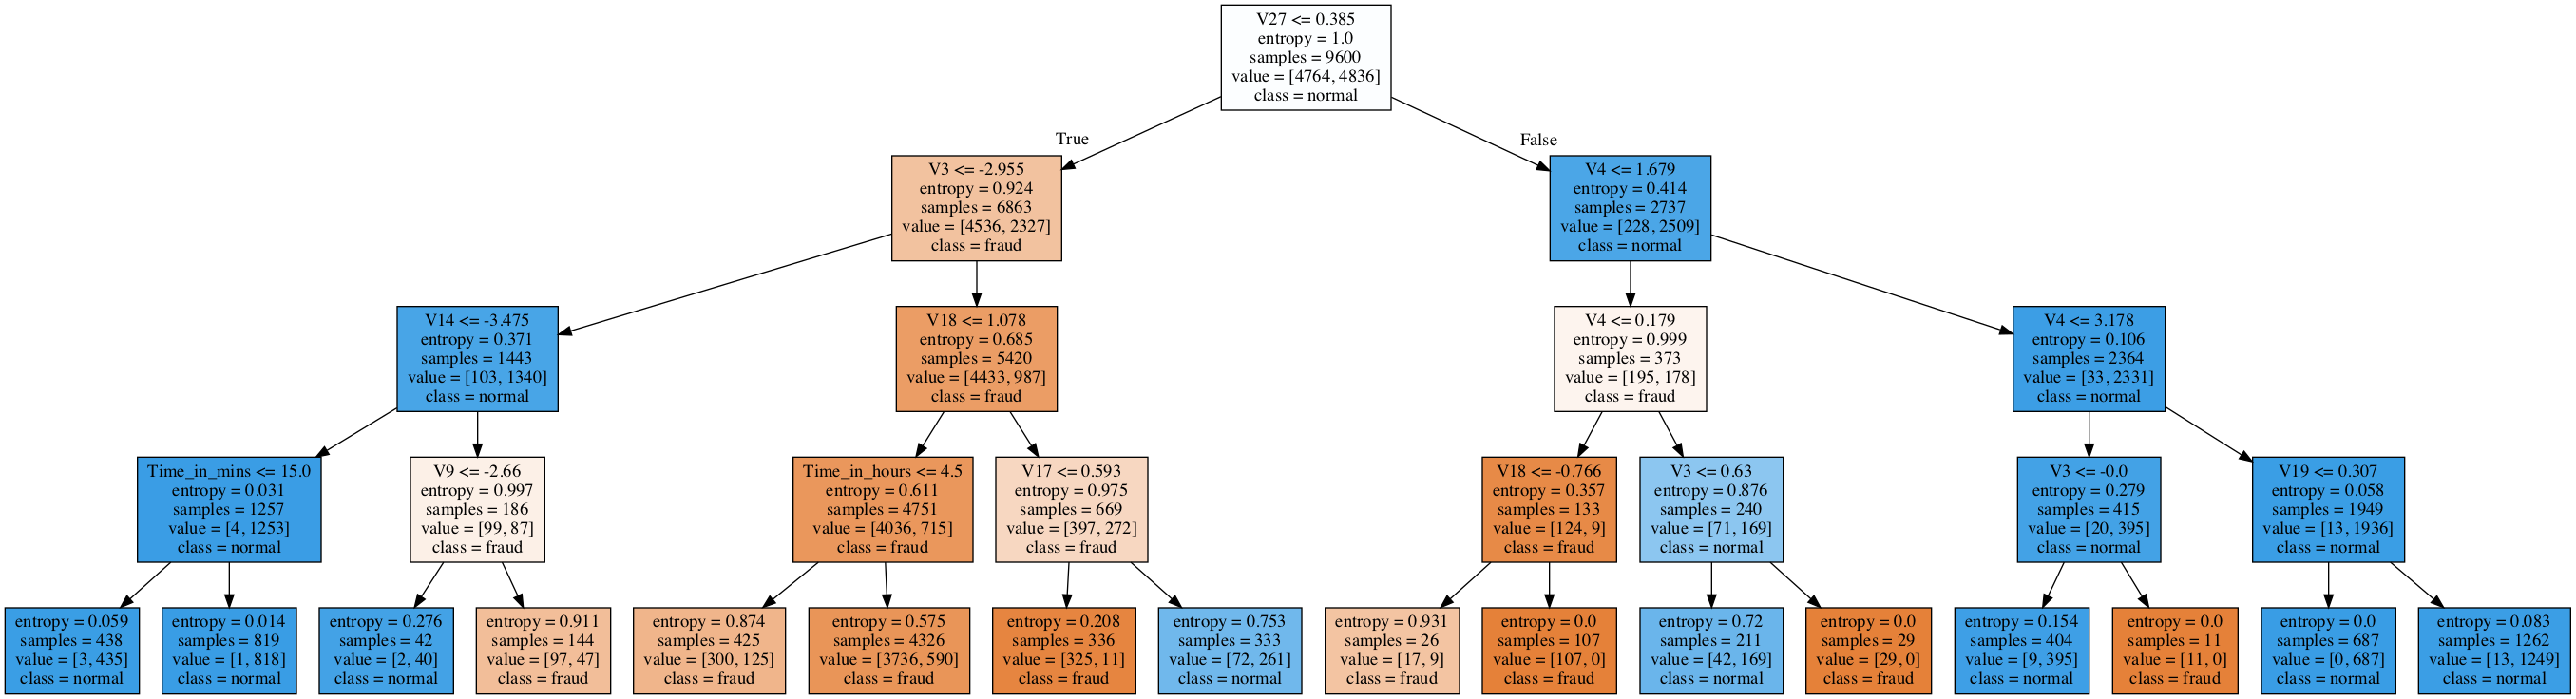

In [53]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 64
)

decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['fraud', 'normal'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
y_test.shape, merged_df.shape

((2400,), (12000, 17))

# Exploring Distribution

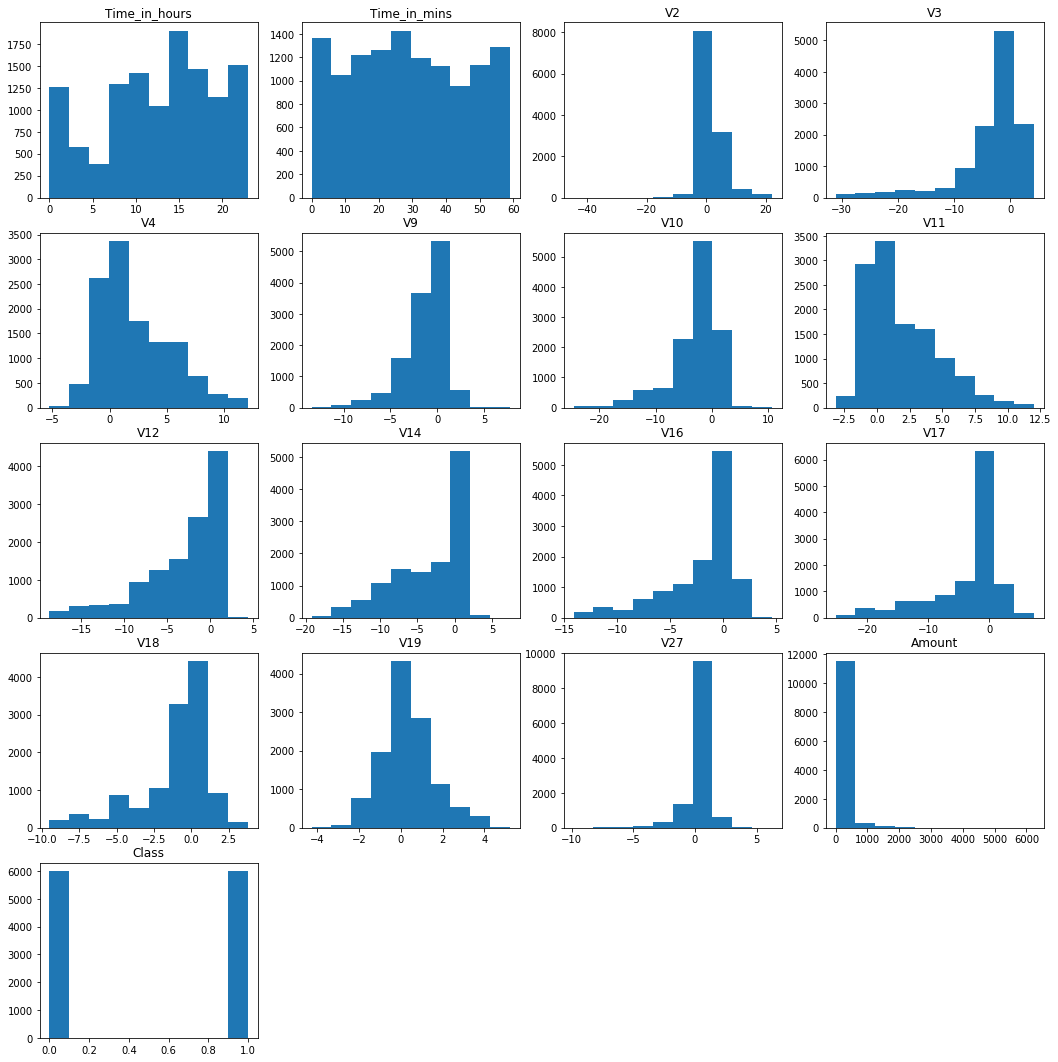

In [53]:
x=1
plt.figure(figsize=(18,38))
for col in merged_df.columns:
  plt.subplot(10,4,x)
  plt.hist(merged_df[col])
  plt.title(col)
  x=x+1

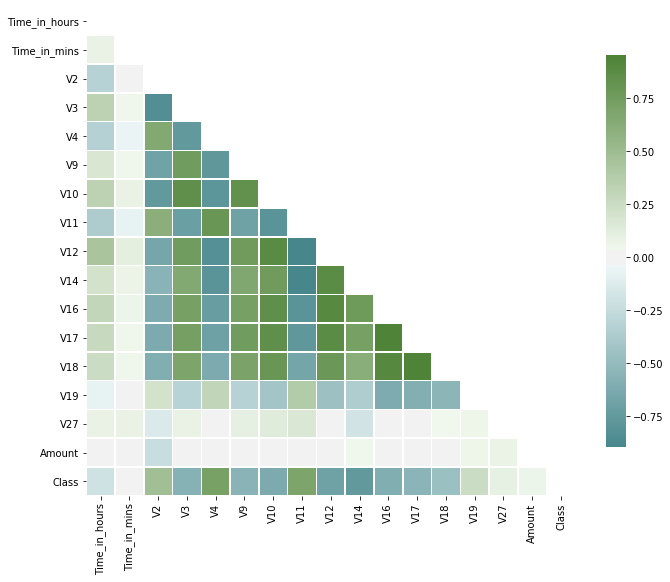

In [54]:
merged_corr = merged_df.corr()
mask = np.triu(np.ones_like(merged_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, -600, as_cmap=True)
sns.heatmap(merged_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8});

In [55]:
merged_corr

Time_in_hours  Time_in_mins        V2        V3        V4  \
Time_in_hours       1.000000      0.078837 -0.318824  0.332377 -0.328686   
Time_in_mins        0.078837      1.000000 -0.008445  0.046872 -0.057966   
V2                 -0.318824     -0.008445  1.000000 -0.844811  0.653050   
V3                  0.332377      0.046872 -0.844811  1.000000 -0.757830   
V4                 -0.328686     -0.057966  0.653050 -0.757830  1.000000   
V9                  0.179236      0.045567 -0.685379  0.755620 -0.776242   
V10                 0.335266      0.086570 -0.757274  0.849990 -0.781445   
V11                -0.366646     -0.080081  0.608386 -0.709786  0.794004   
V12                 0.431470      0.108251 -0.655667  0.753239 -0.829642   
V14                 0.210390      0.065432 -0.562375  0.653801 -0.794588   
V16                 0.298308      0.061309 -0.620859  0.720352 -0.715715   
V17                 0.269931      0.047672 -0.625654  0.729220 -0.698137   
V18                 0.257619      0.046637 -0.599526  0.691712 -0.625859   
V19                -0.079800     -0.019527  0.210721 -0.318295  0.304389   
V27                 0.087398      0.087076 -0.140016  0.090049  0.000206   
Amount              0.012410      0.033961 -0.236047 -0.014629  0.006283   
Class              -0.192755      0.001382  0.484174 -0.565465  0.715298   

                     V9       V10       V11       V12       V14       V16  \
Time_in_hours  0.179236  0.335266 -0.366646  0.431470  0.210390  0.298308   
Time_in_mins   0.045567  0.086570 -0.080081  0.108251  0.065432  0.061309   
V2            -0.685379 -0.757274  0.608386 -0.655667 -0.562375 -0.620859   
V3             0.755620  0.849990 -0.709786  0.753239  0.653801  0.720352   
V4            -0.776242 -0.781445  0.794004 -0.829642 -0.794588 -0.715715   
V9             1.000000  0.841347 -0.693255  0.756726  0.676248  0.720883   
V10            0.841347  1.000000 -0.798728  0.879657  0.757929  0.854320   
V11           -0.693255 -0.798728  1.000000 -0.895461 -0.888959 -0.801504   
V12            0.756726  0.879657 -0.895461  1.000000  0.877683  0.895897   
V14            0.676248  0.757929 -0.888959  0.877683  1.000000  0.772170   
V16            0.720883  0.854320 -0.801504  0.895897  0.772170  1.000000   
V17            0.750548  0.851847 -0.767880  0.871807  0.725604  0.950458   
V18            0.700414  0.796136 -0.663789  0.791453  0.613801  0.903872   
V19           -0.322396 -0.414136  0.393487 -0.449997 -0.360513 -0.617938   
V27            0.101743  0.134205  0.169635 -0.024715 -0.188171 -0.027187   
Amount         0.022083  0.005860 -0.022149  0.017392  0.043229 -0.010234   
Class         -0.560496 -0.625541  0.694629 -0.687698 -0.756649 -0.595350   

                    V17       V18       V19       V27    Amount     Class  
Time_in_hours  0.269931  0.257619 -0.079800  0.087398  0.012410 -0.192755  
Time_in_mins   0.047672  0.046637 -0.019527  0.087076  0.033961  0.001382  
V2            -0.625654 -0.599526  0.210721 -0.140016 -0.236047  0.484174  
V3             0.729220  0.691712 -0.318295  0.090049 -0.014629 -0.565465  
V4            -0.698137 -0.625859  0.304389  0.000206  0.006283  0.715298  
V9             0.750548  0.700414 -0.322396  0.101743  0.022083 -0.560496  
V10            0.851847  0.796136 -0.414136  0.134205  0.005860 -0.625541  
V11           -0.767880 -0.663789  0.393487  0.169635 -0.022149  0.694629  
V12            0.871807  0.791453 -0.449997 -0.024715  0.017392 -0.687698  
V14            0.725604  0.613801 -0.360513 -0.188171  0.043229 -0.756649  
V16            0.950458  0.903872 -0.617938 -0.027187 -0.010234 -0.595350  
V17            1.000000  0.938330 -0.585652 -0.006328 -0.017292 -0.556181  
V18            0.938330  1.000000 -0.547655  0.041250 -0.009432 -0.462148  
V19           -0.585652 -0.547655  1.000000  0.053262  0.052580  0.255177  
V27           -0.006328  0.041250  0.053262  1.000000  0.074943  0.094346  
Amount        -0.017292 -0.009432  0.052580

# Dimensionality Reduction

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# We just want the first two principal components
pca = PCA(n_components=2)

# calling fit_transform method with our data
pca_components = pca.fit_transform(merged_df)

In [30]:
pca_components

array([[ -32.63692003,  -15.33290332],
       [ -70.05230637,   13.14015194],
       [-104.28249664,  -18.34458056],
       ...,
       [ 147.62057306,  -10.25104493],
       [-101.48865723,  -17.4169431 ],
       [  -5.36493697,    3.58299635]])

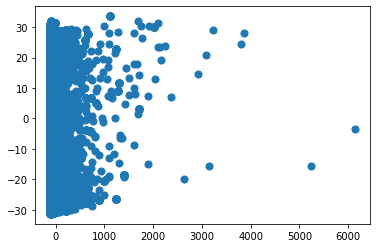

In [31]:
plt.scatter(pca_components[ : , 0], pca_components[ : , 1], s =50);

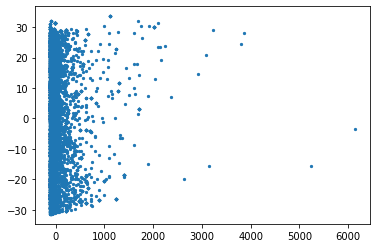

In [32]:
plt.scatter(pca_components[ : , 0], pca_components[ : , 1], s = 5);

PCA shows most cluster to the left of the graph and we see outliers to the far right of the graph

# t-SNE

In [45]:
from sklearn.manifold import TSNE
import time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(merged_df)
time_start = time.time()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.012s...
[t-SNE] Computed neighbors for 12000 samples in 0.657s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergenc

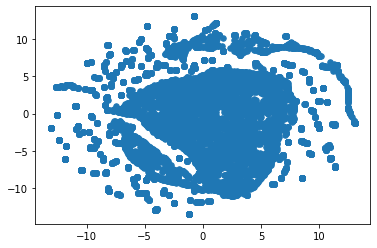

In [46]:
plt.scatter(tsne_results[ : , 0], tsne_results[ : , 1], s =30);

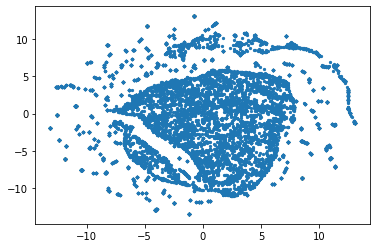

In [47]:
plt.scatter(tsne_results[ : , 0], tsne_results[ : , 1], s =5);

t-SNE does nor reveal much, we see one big cluster and one long skinny one underneath it.

In [48]:
# decreasing perplexity
tsne2 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results2 = tsne2.fit_transform(merged_df)
time_start = time.time()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.012s...
[t-SNE] Computed neighbors for 12000 samples in 0.586s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence

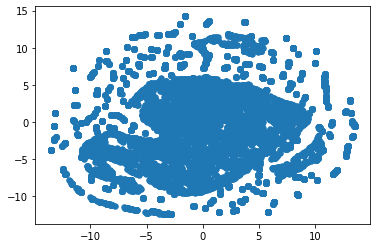

In [49]:
plt.scatter(tsne_results2[ : , 0], tsne_results2[ : , 1], s =30);

We see two separate clusters then a huge cluster joined with one at the bottom. We still cannot see full separation.

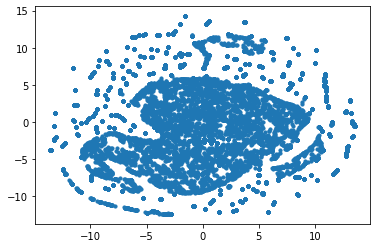

In [50]:
plt.scatter(tsne_results2[ : , 0], tsne_results2[ : , 1], s =10);

As we decrease perplexity we see a little separation in our t-NSE cluster. However, not much to make a significance difference.

In [51]:
# increasing perplexity
tsne3 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results3 = tsne3.fit_transform(merged_df)
time_start = time.time()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.011s...
[t-SNE] Computed neighbors for 12000 samples in 0.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergenc

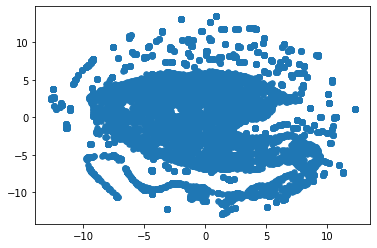

In [52]:
plt.scatter(tsne_results3[ : , 0], tsne_results3[ : , 1], s =30);

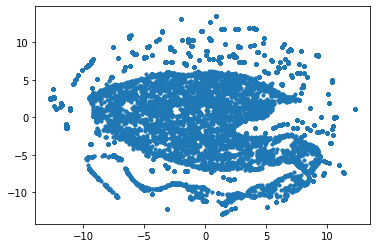

In [53]:
plt.scatter(tsne_results3[ : , 0], tsne_results3[ : , 1], s =10);

When we decrease perplexity and set it at is at 30, we see one huge cluster along with two tiny ones.
As we increase perplexity our result shows the exact merrior(opposite) when we decreased preplexity. Our t-SNE also does not return clearly visible clusters. Most scatter plots above shows one huge cluster and tiny skinny clusters around it.

# UMAP

In [54]:
# adding umap to get a better visual perspective
!pip install umap-learn
import umap
time_start = time.time()
umap_results = umap.UMAP(n_neighbors=5,
                         min_dist=0.3,
                         metric='correlation').fit_transform(merged_df)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 10.981770992279053 seconds


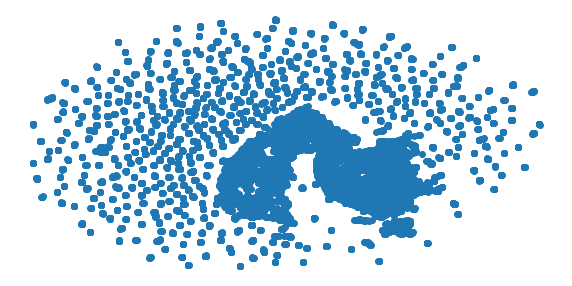

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We don't see any separation in this figure. We do see many tiny specs all around a huge figure.

In [56]:
# decreasing neighbors
umap_results2 = umap.UMAP(n_neighbors=3,
                         min_dist=0.3,
                         metric='correlation').fit_transform(merged_df)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 18.061901092529297 seconds


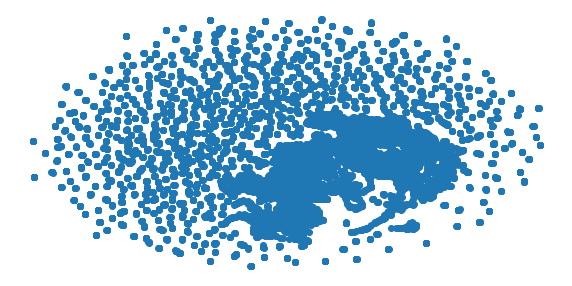

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results2[:, 0], umap_results2[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In our second UMAP result we see two figures intertwined, however its still not separated.

In [58]:
# increasing neighbors
umap_results3 = umap.UMAP(n_neighbors=10,
                         min_dist=0.3,
                         metric='correlation').fit_transform(merged_df)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 29.28755521774292 seconds


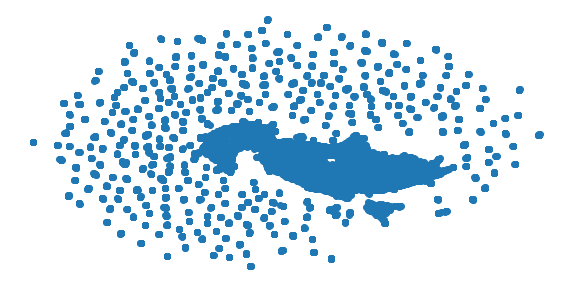

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results3[:, 0], umap_results3[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we increase the neighbors to 10. We do see almost a separation that looks like three different clusters. This is clearer than umap_result2 we can see three different shapes are taking place.

In [60]:
# increasing min dist
umap_results4 = umap.UMAP(n_neighbors=3,
                         min_dist=0.5,
                         metric='correlation').fit_transform(merged_df)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 36.521116971969604 seconds


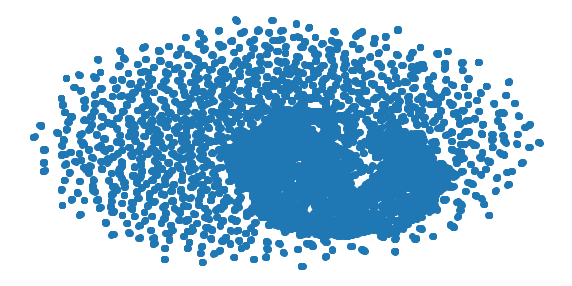

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results4[:, 0], umap_results4[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Once we increase the mint-dist we still don't see much separation.

In [62]:
# decreasing min dist
umap_results5 = umap.UMAP(n_neighbors=3,
                         min_dist=0.1,
                         metric='correlation').fit_transform(merged_df)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 44.2363760471344 seconds


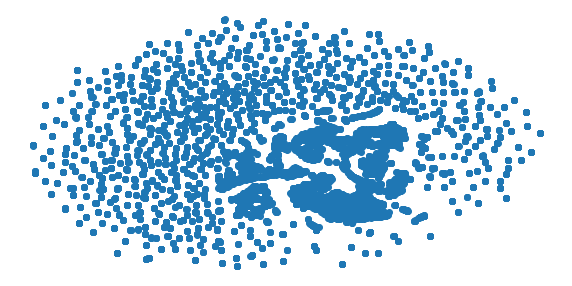

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results5[:, 0], umap_results5[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In this final UMAP result we see some separation, we see about six different clusters all interwined. We see in our UMAP that decreasing neighbors didn't have any effect on our models. When we decreased mint-dist we did see better separation and clusters forming.

# Unsupervised Learning Models

Below we introduce the Silhouette coefficient, it is possible to get values less than 0, but 1 still indicates perfect agreement. Keep in mind 0 indicates perfect randomness for each datapoint, the silhouette coefficient is the difference between the mean distance between that datapoint and all other points in its cluster. The mean distance between that of that datapoint and all other points in the nearest other clusters divided by whichever of the two values is highest.

# K-Means

In [122]:
# standardizing data
scaler = StandardScaler()
X_std = scaler.fit_transform(merged_df)

In [123]:
from sklearn.cluster import KMeans
from sklearn import metrics
K_labels1 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels1, metric='euclidean'))

0.4262119186216055


In [124]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_std)
    distortions.append(kmeanModel.inertia_)

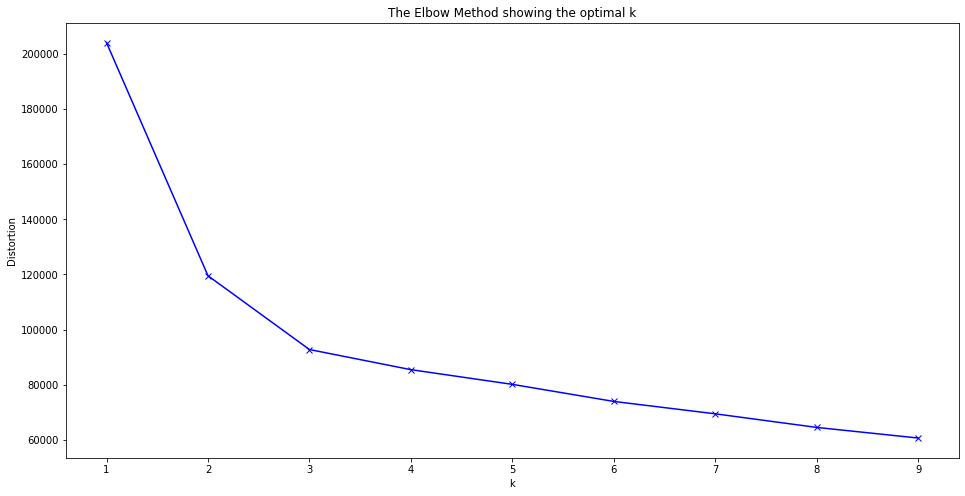

In [125]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Above, we attempt to find the best centroids form the centers of the k clusters so we set our K range from 1 through 10. Our Elbow Method is when we use inertia by identifying the optimal number of clusters that can be used in K-means. Simply put, when our inertia begins to decrease in a linear fashion (point where an “elbow” is formed), this is our optimal number of clusters. We see the elbow starts to form around 3.

In [126]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_std)

KMeans(n_clusters=3)

In [44]:
# merged_df['k_means']=kmeanModel.predict(X_std)
# merged_df['Class']=merged_df['Class']
# fig, axes = plt.subplots(1, 2, figsize=(16,8))
# axes[0].scatter(merged_df['Class'], merged_df['Class'], c=merged_df['Class'])
# axes[1].scatter(merged_df['Class'], merged_df['Class'], c=merged_df['k_means'], cmap=plt.cm.Set1)
# axes[0].set_title('Actual', fontsize=18)
# axes[1].set_title('K_Means', fontsize=18)

In [71]:
K_labels2 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels2, metric='euclidean'))

0.35568474221426316


In [72]:
K_labels3 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels3, metric='euclidean'))

0.33504256183344555


In [73]:
K_labels4 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels4, metric='euclidean'))

0.2846612565818261


In [74]:
K_labels5 = KMeans(n_clusters=7, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels5, metric='euclidean'))

0.2679617218197146


In [75]:
K_labels6 = KMeans(n_clusters=9, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels6, metric='euclidean'))

0.19147418492527413


In [76]:
K_labels7 = KMeans(n_clusters=8, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels7, metric='euclidean'))

0.1844622384734032


In [77]:
K_labels8 = KMeans(n_clusters=6, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, K_labels8, metric='euclidean'))

0.16557625669688064


From our K-means model, our best Silhouette score is K_labels1 which is about 42%.

Let's visualize the predictions and the true labels of the observations. To plot in two-dimensional space, we reduce our data dimensionality. For this purpose, we apply PCA and use the first two principal components.
In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors display the true classes.

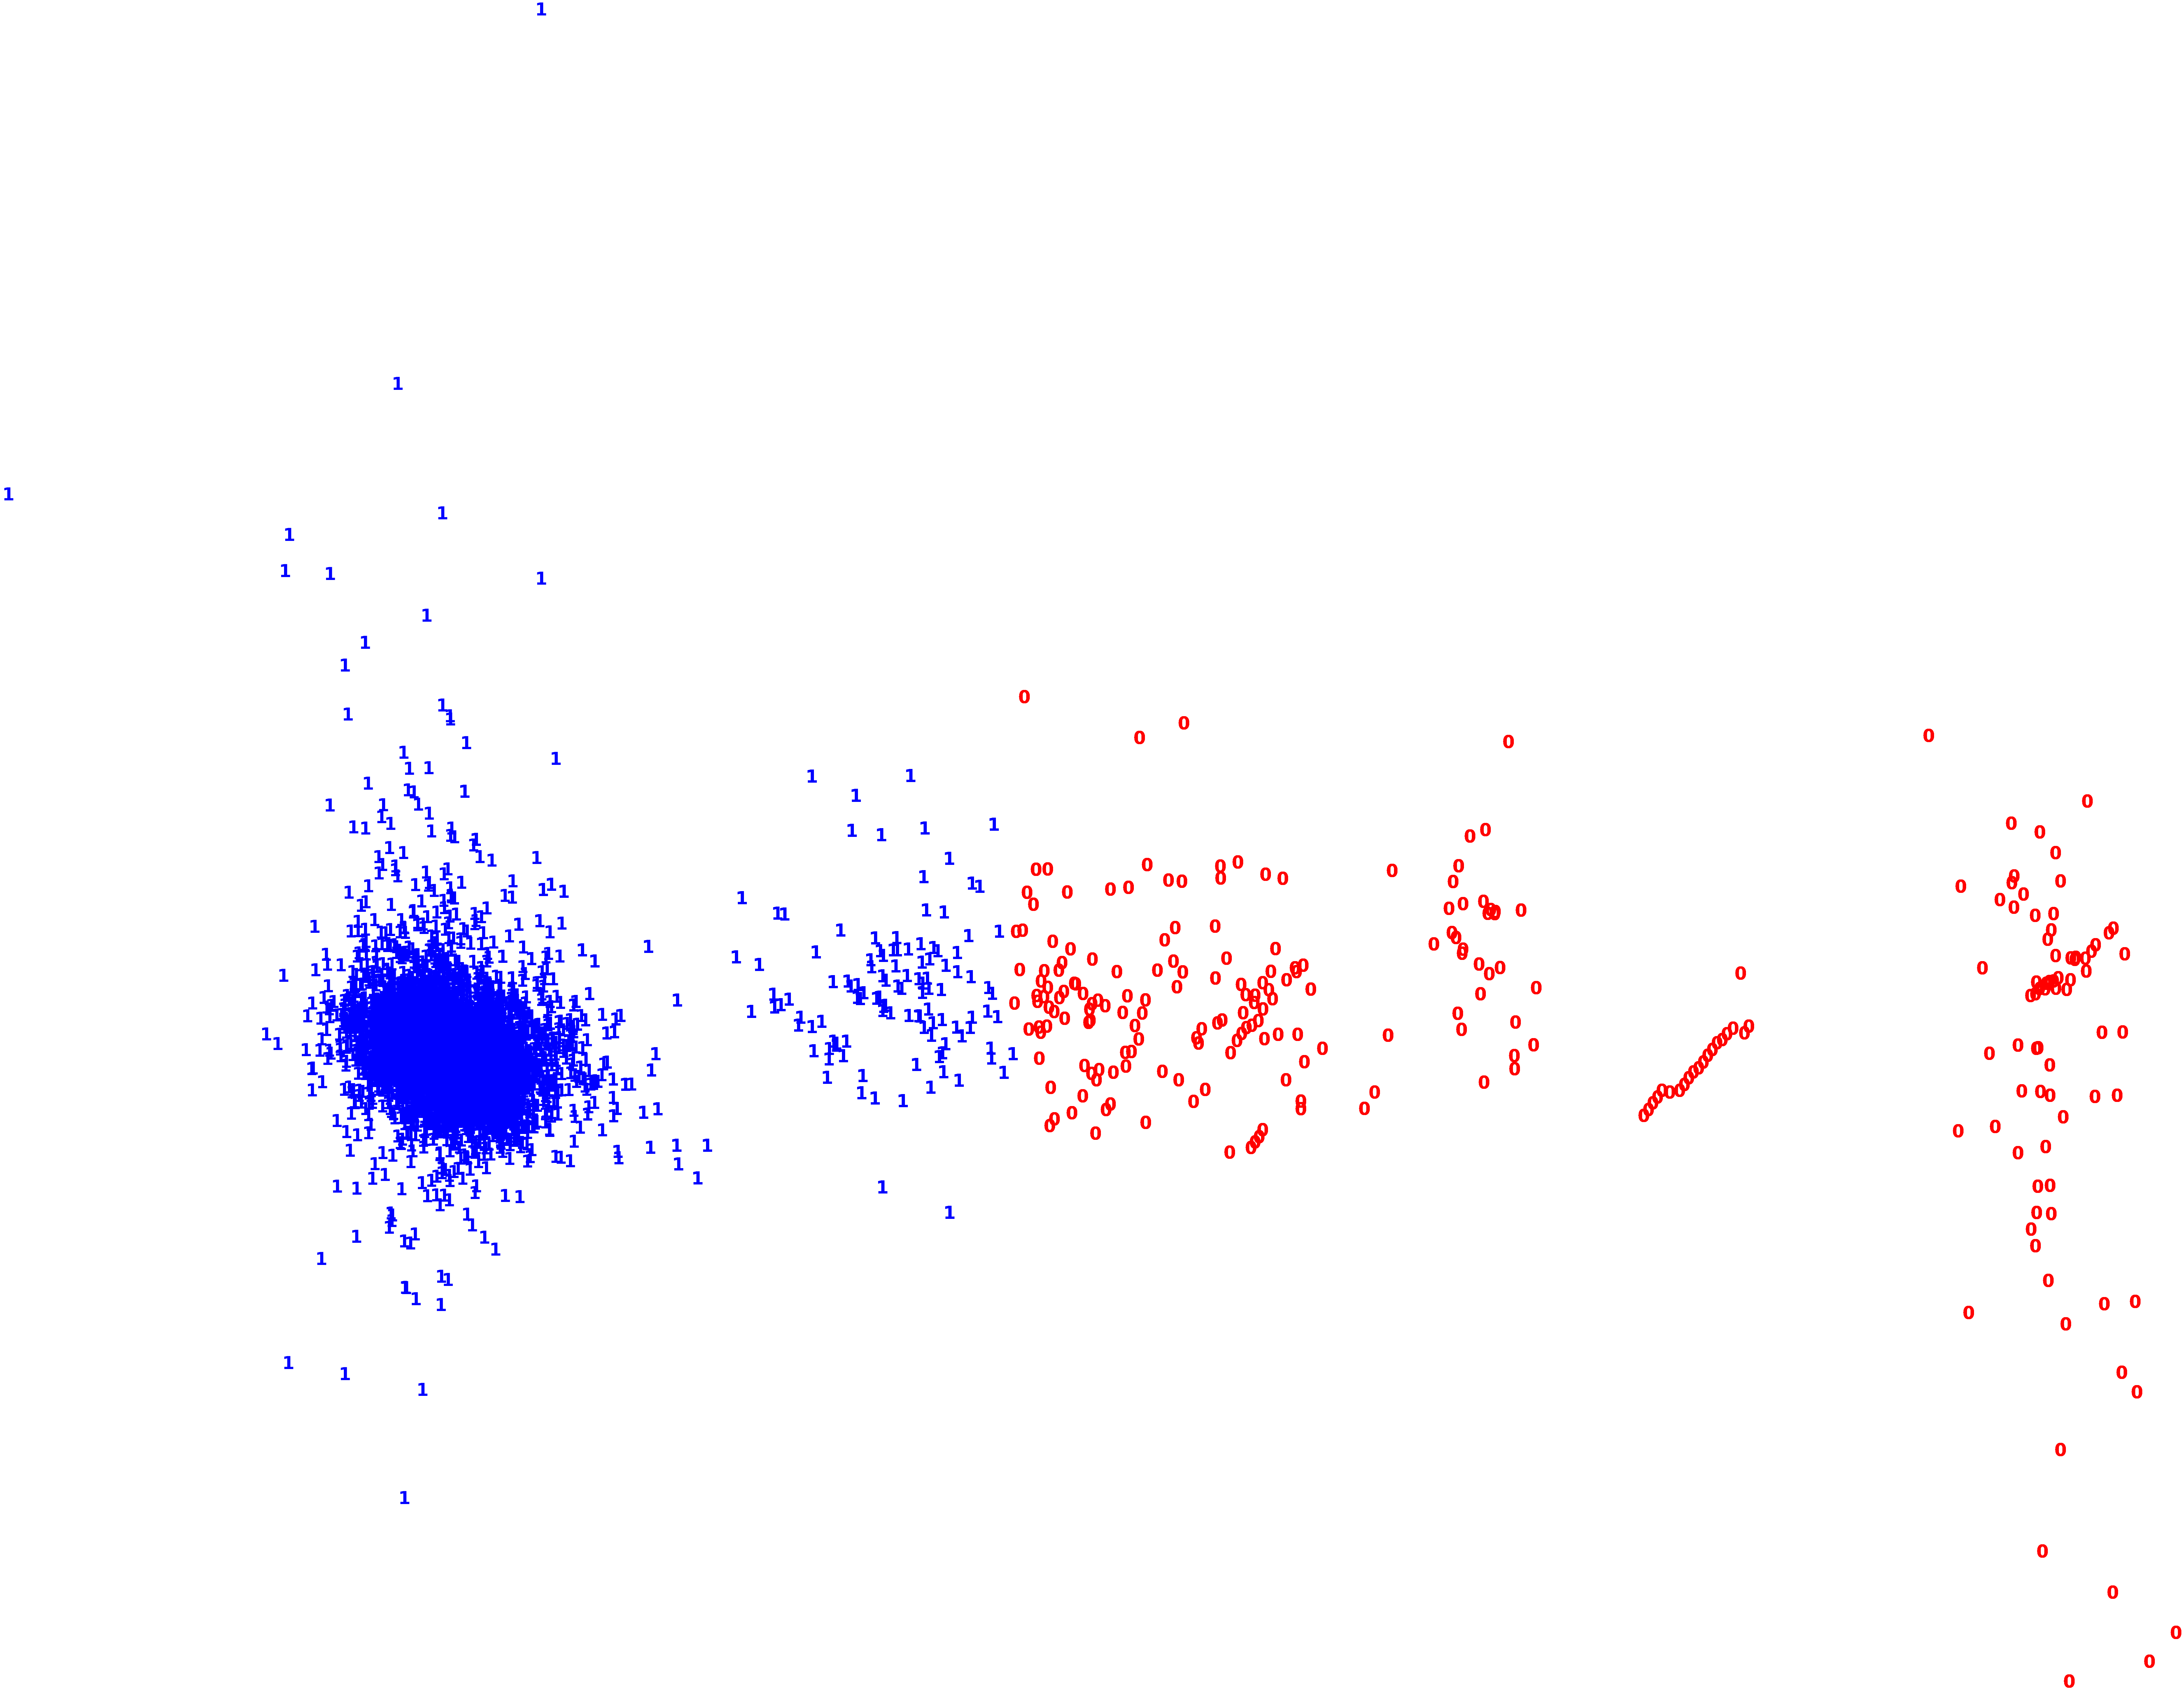

In [78]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(K_labels1[i]),
             color=colours[K_labels1[i]],
             fontdict={'weight': 'bold', 'size': 60}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

When two clusters are selected, there's a clear separation of class and amount of clusters. Great job by K-means it seems to successfully identify linearly separable both class. We see a good assigned prediction.

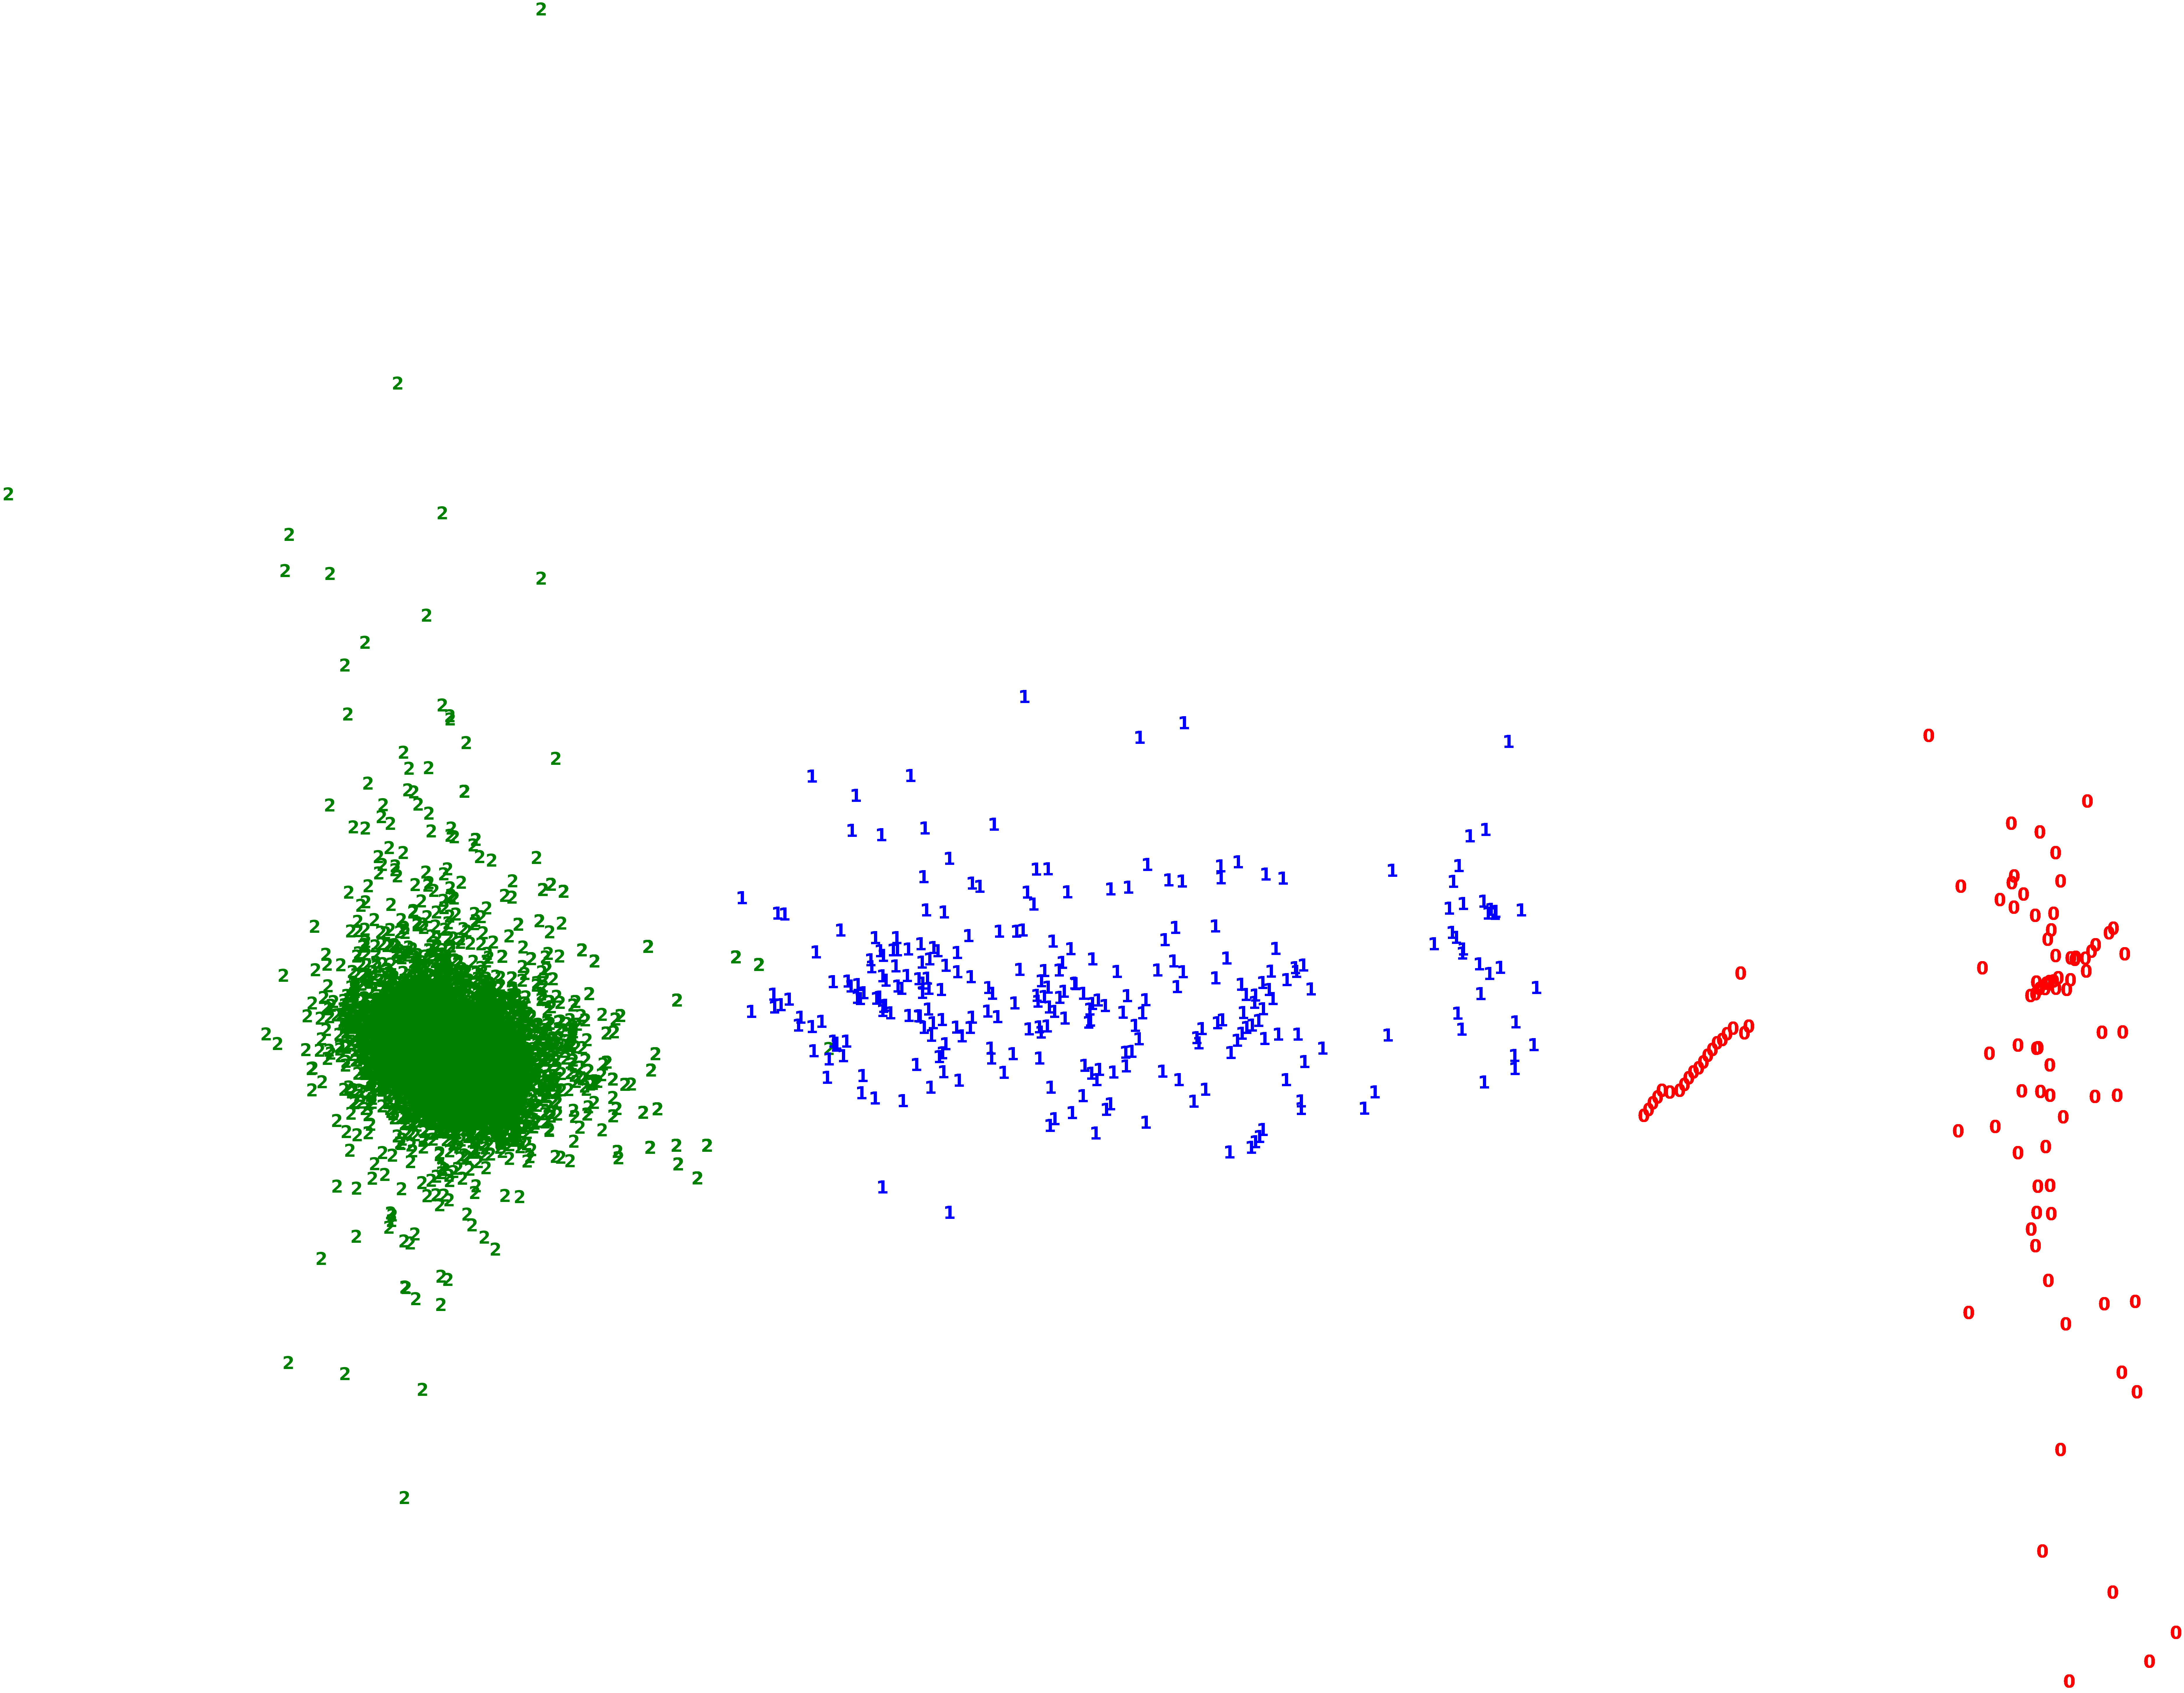

In [100]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(K_labels2[i]),
             color=colours[K_labels2[i]],
             fontdict={'weight': 'bold', 'size': 60}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

At 3 clusters our classes are very much separated, but we do see a green two in the middle of the ones. Overall this is a nice work by separation.

# Hierarchical clustering

# Linkage = Complete

In [103]:
from sklearn.cluster import AgglomerativeClustering
H_labels1 = AgglomerativeClustering(linkage='complete', affinity='cosine', 
                                  n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels1, metric='euclidean'))

0.37834377411654063


In [104]:
H_labels2 = AgglomerativeClustering(linkage='complete', affinity='cosine', 
                                  n_clusters=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels2, metric='euclidean'))

0.18482887307570348


From our Hierarchical Linkage cluster, our best Silhouette score is H_labels1 which is about 38%

# Linkage = Ward

In [105]:
H_labels3 = AgglomerativeClustering(linkage='ward', affinity='euclidean', 
                                  n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels3, metric='euclidean'))

0.37836393468939045


In [106]:
H_labels4 = AgglomerativeClustering(linkage='ward', affinity='euclidean', 
                                  n_clusters=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels4, metric='euclidean'))

0.3604790093661633


In [107]:
H_label5 = AgglomerativeClustering(linkage='ward', affinity='euclidean', 
                                  n_clusters=4).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_label5, metric='euclidean'))

0.3103850577964926


In [108]:
H_labels6 = AgglomerativeClustering(linkage='ward', affinity='euclidean', 
                                  n_clusters=5).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels6, metric='euclidean'))

0.319314028437206


From our Hierarchical Linkage Ward cluster, our best Silhouette score is H_labels3 which is about 38%

# Linkage = Average

In [109]:
H_labels7 = AgglomerativeClustering(linkage='average', affinity='cosine', 
                                  n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels7, metric='euclidean'))

0.3685911023899304


In [110]:
H_labels8 = AgglomerativeClustering(linkage='average', affinity='cosine', 
                                  n_clusters=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels8, metric='euclidean'))

0.27363886409387456


In [111]:
H_labels9 = AgglomerativeClustering(linkage='average', affinity='cosine', 
                                  n_clusters=4).fit_predict(X_std)
print(metrics.silhouette_score(X_std, H_labels9, metric='euclidean'))

0.1933415114624341


From our Hierarchical Linkage Average cluster, our best Silhouette score is H_labels7 which is about 37%

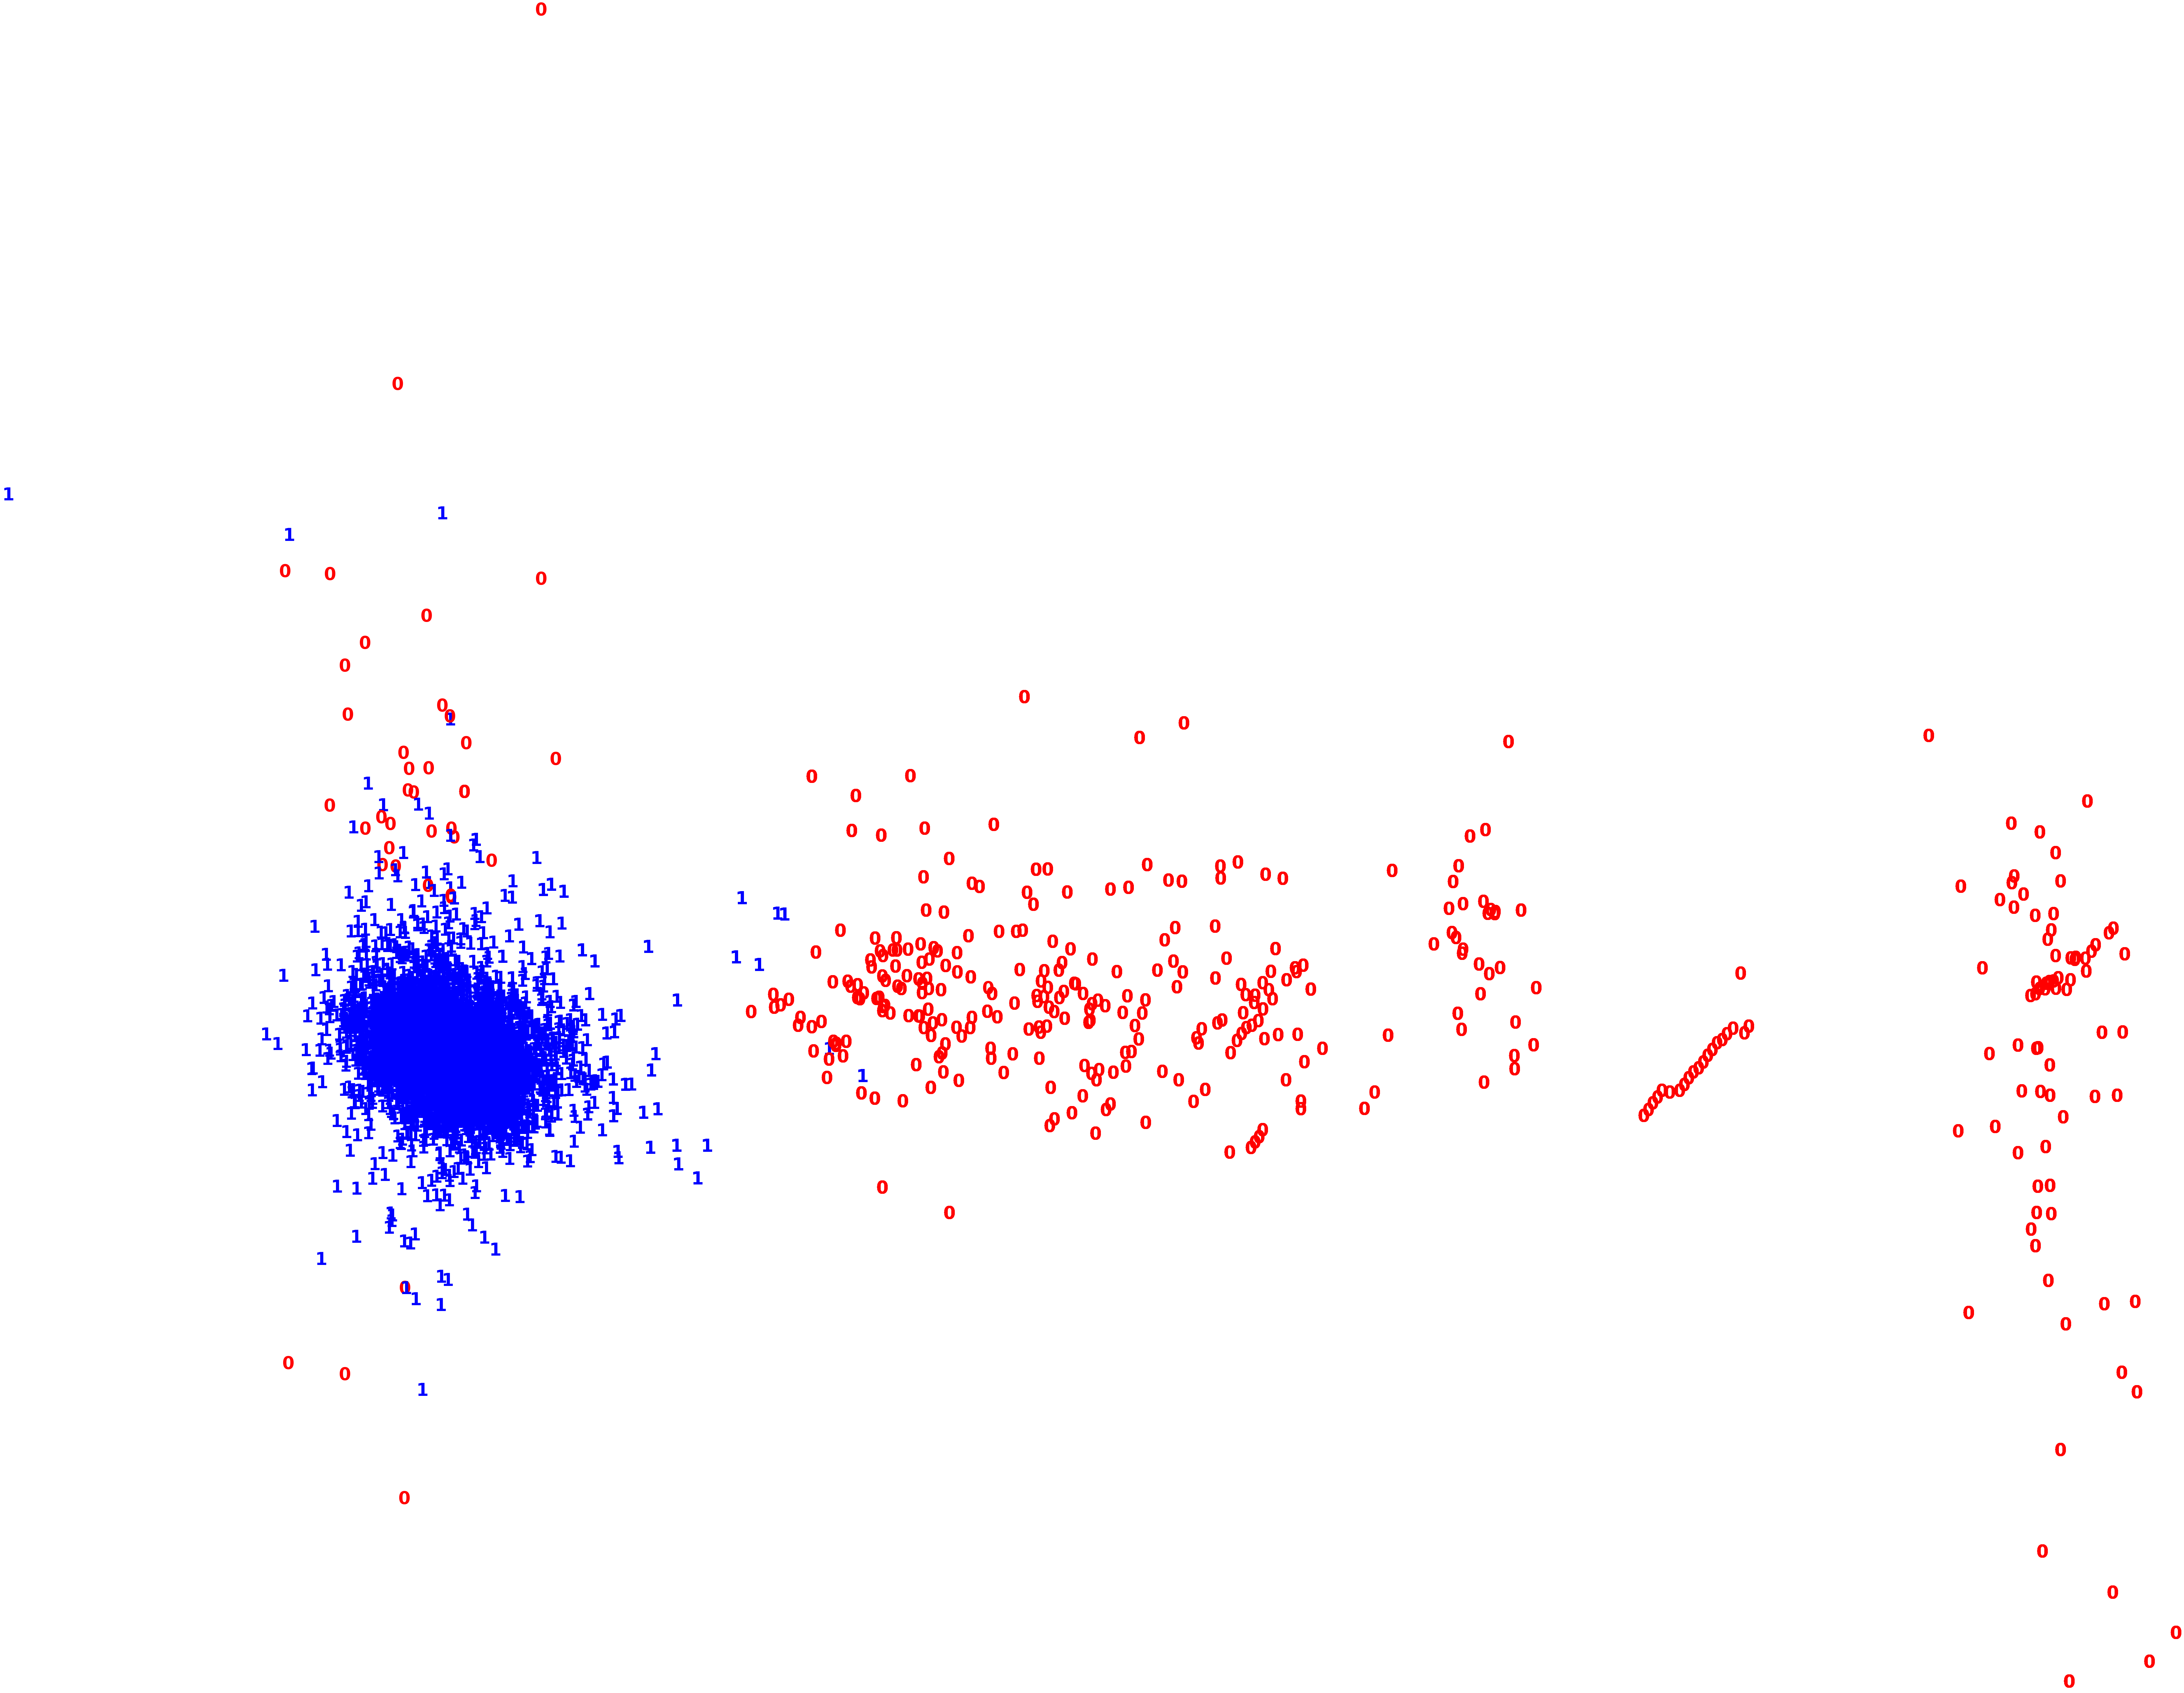

In [112]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(H_labels3[i]),
             color=colours[H_labels3[i]],
             fontdict={'weight': 'bold', 'size': 60}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Using Ward Hierarchical, visiually our clusters are not terrible. We are able to see an ok amount of separation, however we do see a good amount of wrong assigned lables.

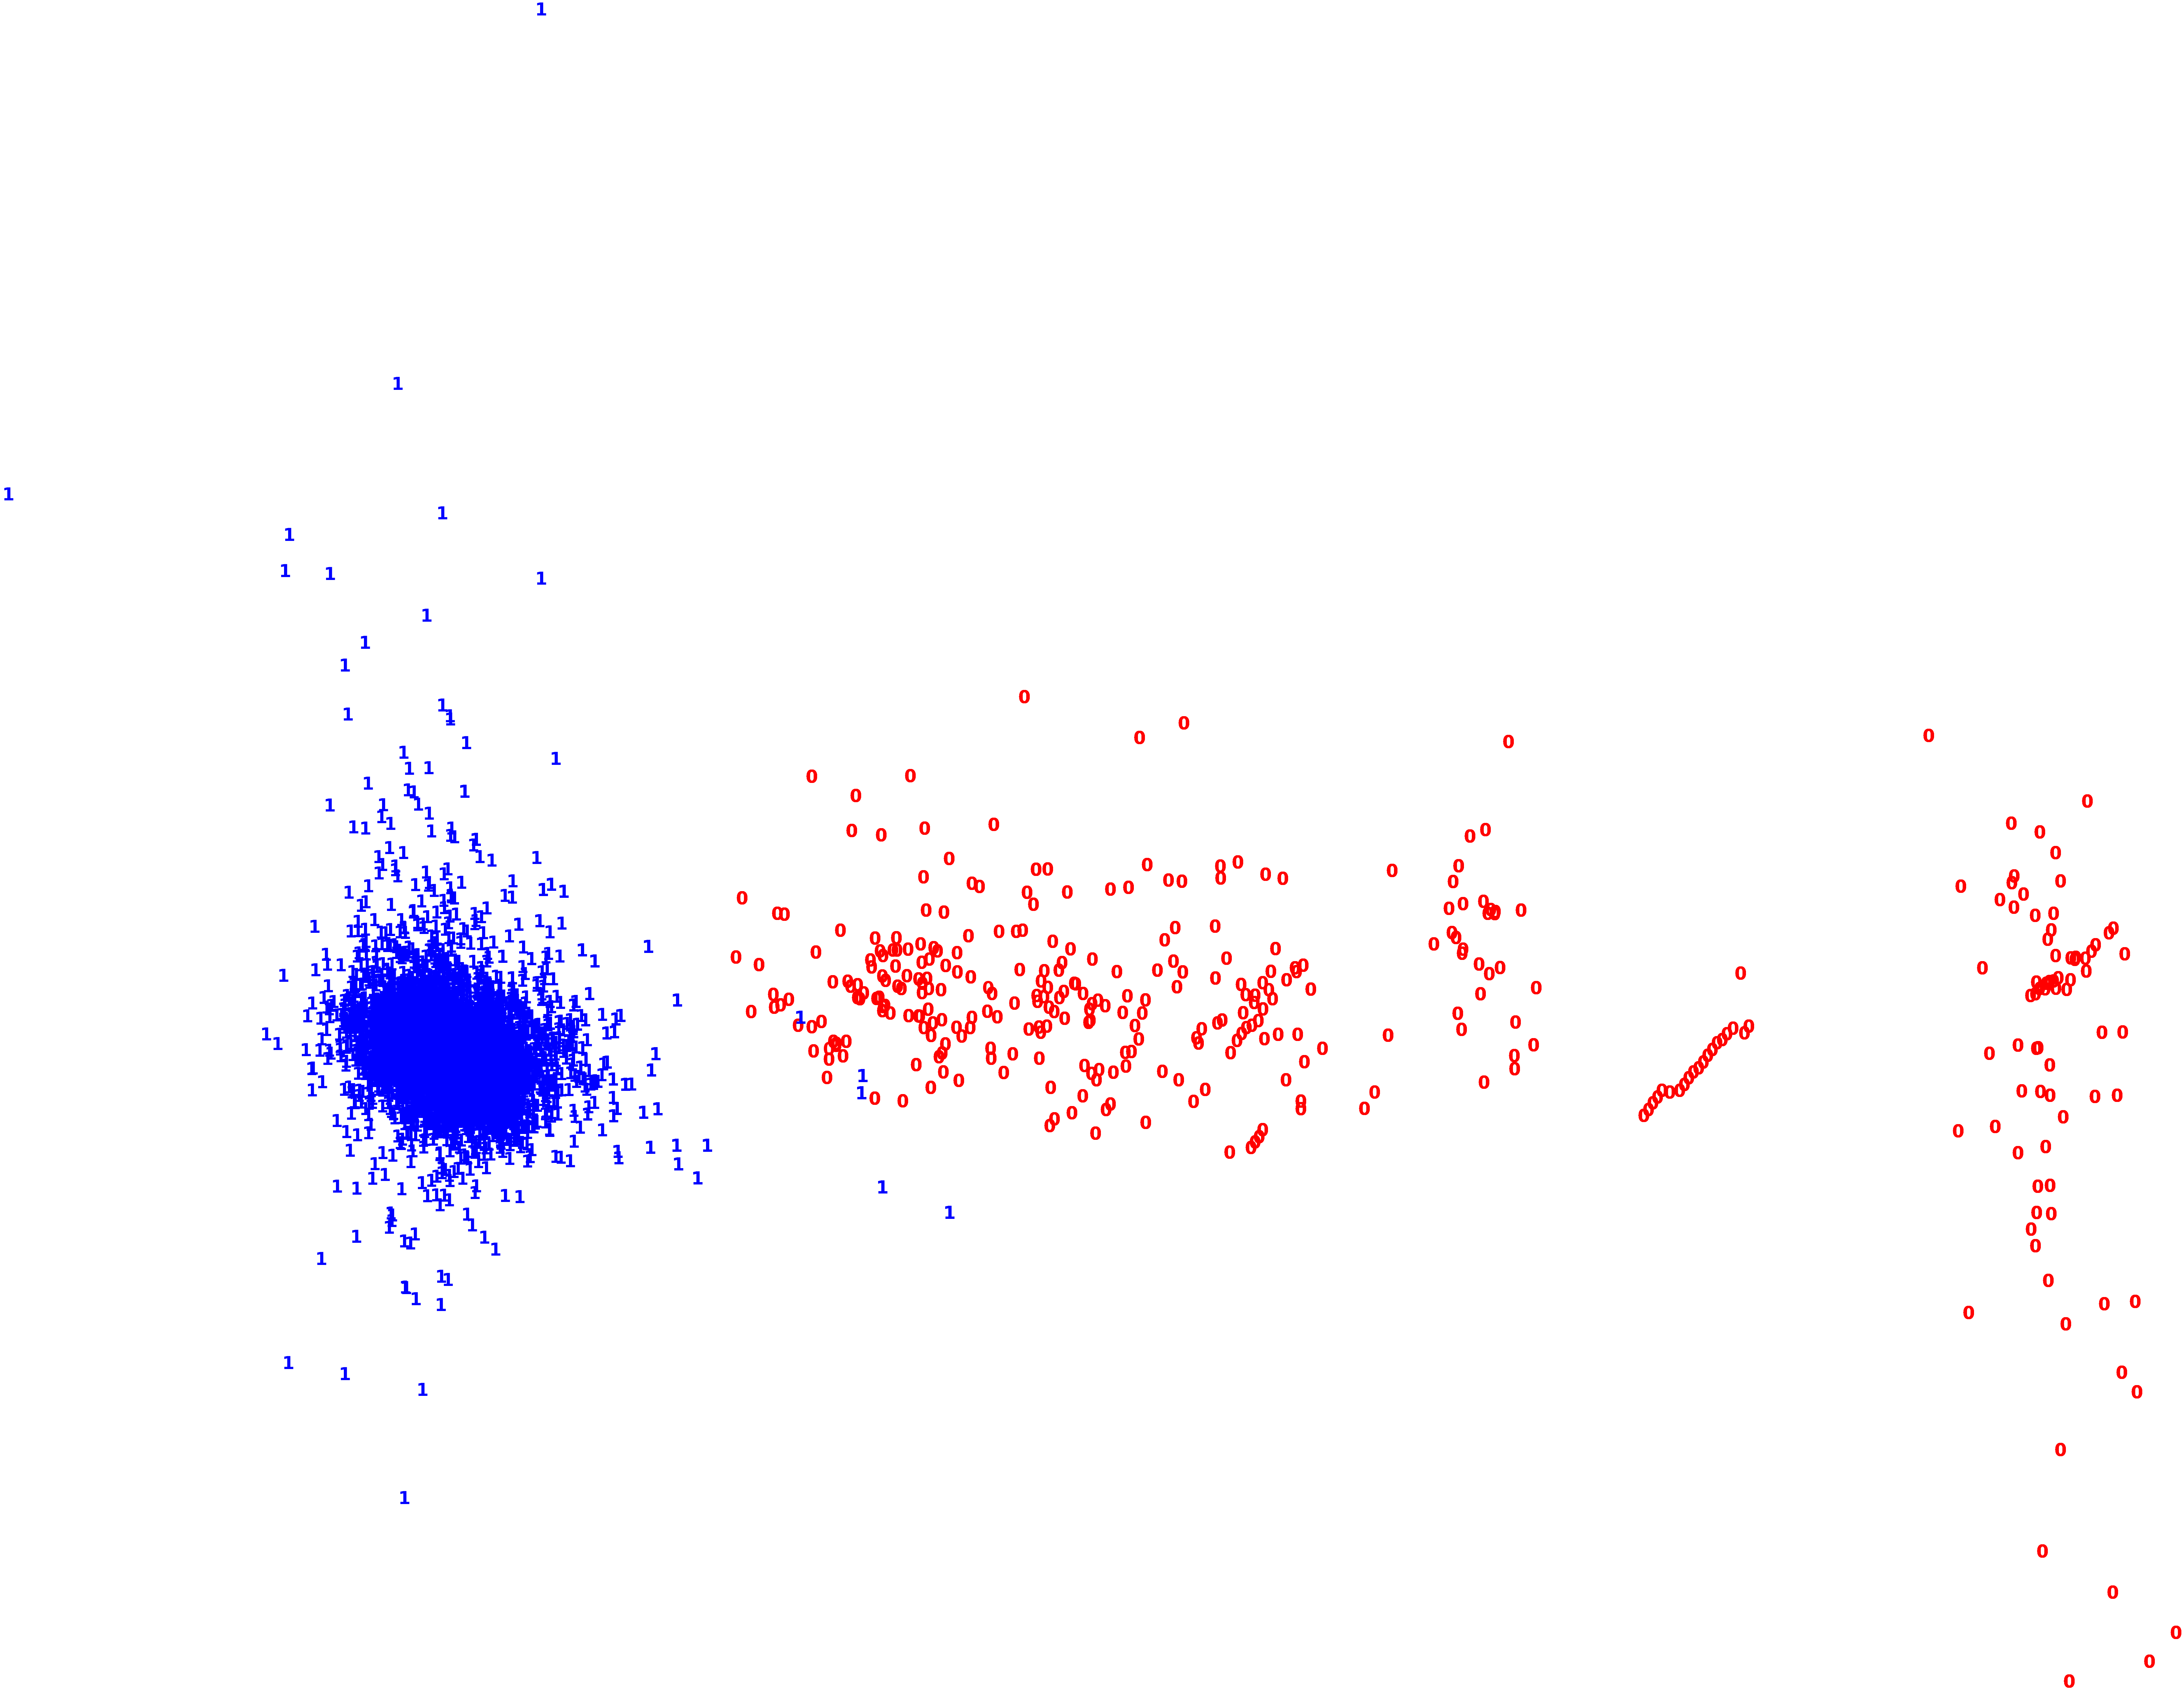

In [113]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(H_labels1[i]),
             color=colours[H_labels1[i]],
             fontdict={'weight': 'bold', 'size': 60}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In this Ward Hierarchical we notice a much better separation when it comes to true classes and clusters. We do see about five blue clusters mixed within the red.

# DBSCAN

In [80]:
from sklearn.cluster import DBSCAN
D_labels1 = DBSCAN(eps=1, min_samples=5).fit_predict(X_std)
print(metrics.silhouette_score(X_std, D_labels1, metric='euclidean'))

0.3907578854289373


In [81]:
# Increaseing EPS
D_labels2 = DBSCAN(eps=5, min_samples=5).fit_predict(X_std)
print(metrics.silhouette_score(X_std, D_labels2, metric='euclidean'))

0.6658305943032904


In [82]:
D_labels3 = DBSCAN(eps=6, min_samples=5).fit_predict(X_std)
print(metrics.silhouette_score(X_std, D_labels3, metric='euclidean'))

0.75262255915986


In [83]:
D_labels4 = DBSCAN(eps=9, min_samples=5).fit_predict(X_std)
print(metrics.silhouette_score(X_std, D_labels4, metric='euclidean'))

0.7983352750434074


In [84]:
# Decreasing min-samples
D_labels5 = DBSCAN(eps=1, min_samples=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, D_labels5, metric='euclidean'))

0.33772466285980784


In [85]:
D_labels6 = DBSCAN(eps=1, min_samples=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, D_labels6, metric='euclidean'))

0.2883145122371847


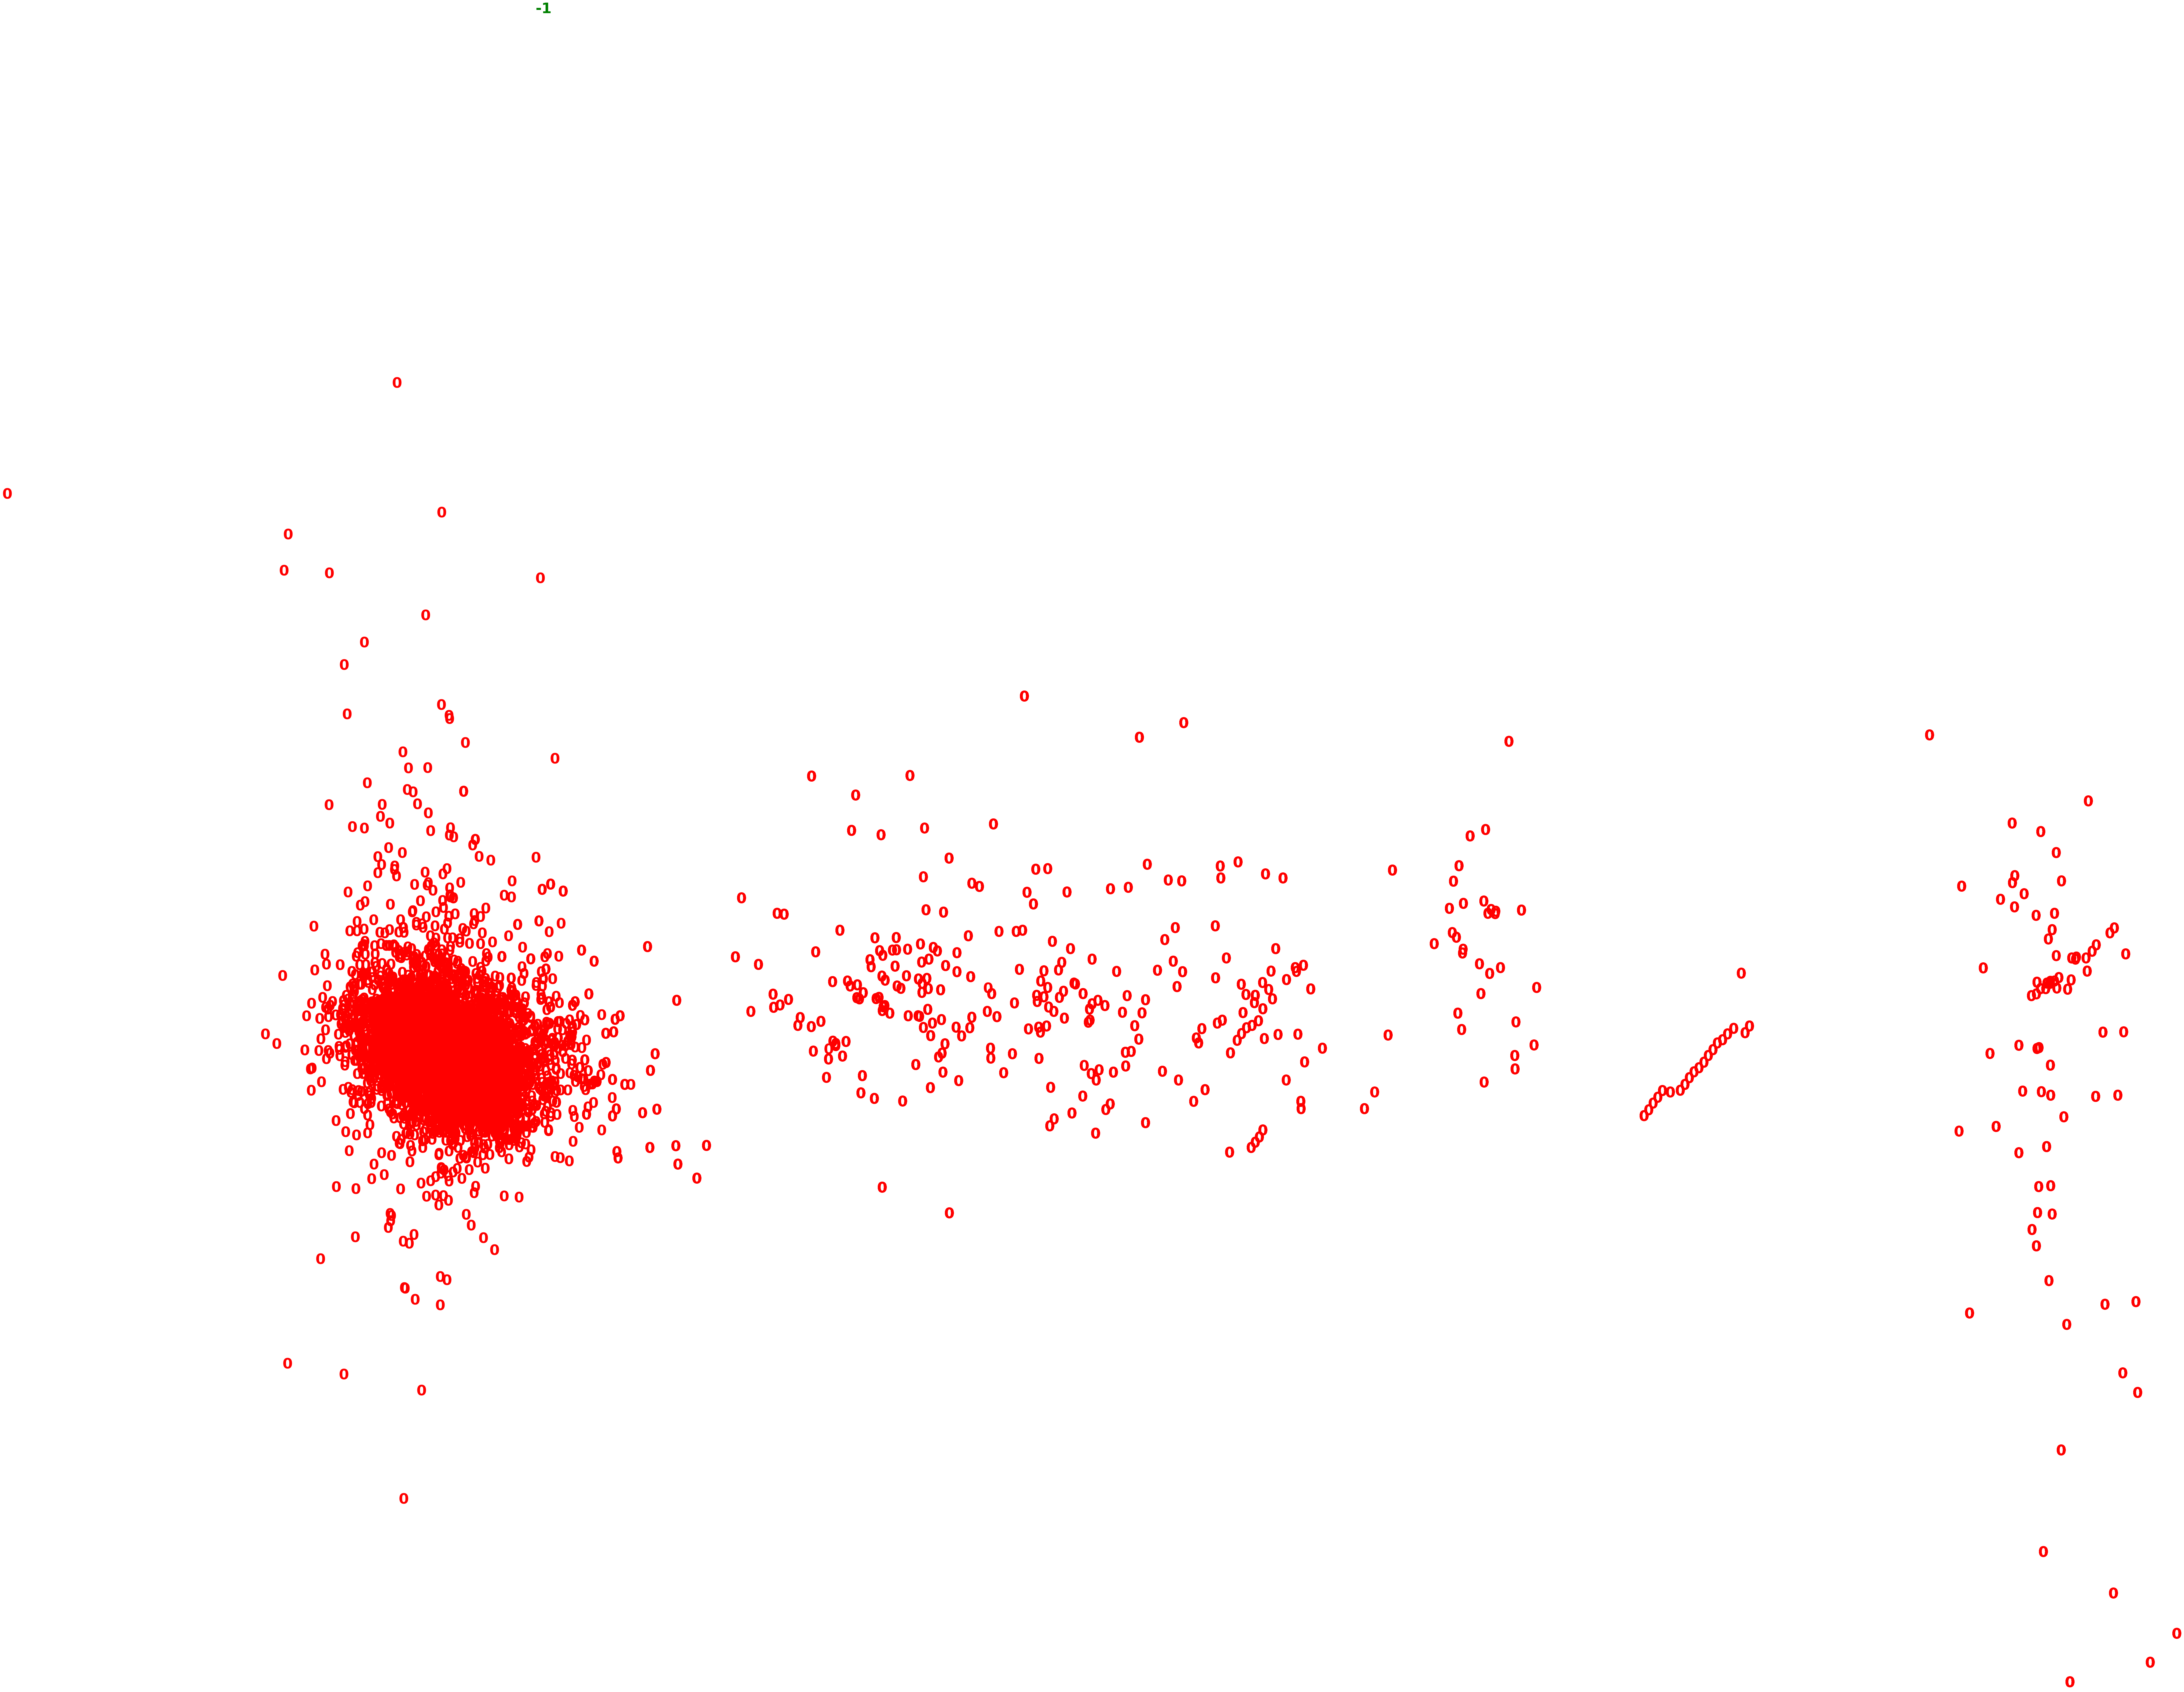

In [86]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(D_labels4[i]),
             color=colours[D_labels4[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The cluster on the far left is heavly densed and the others are spread out. This shows that the dense cluster are normal transactions and the spread out ones are fraud. DBSCAN is better for balanced densed dataset.

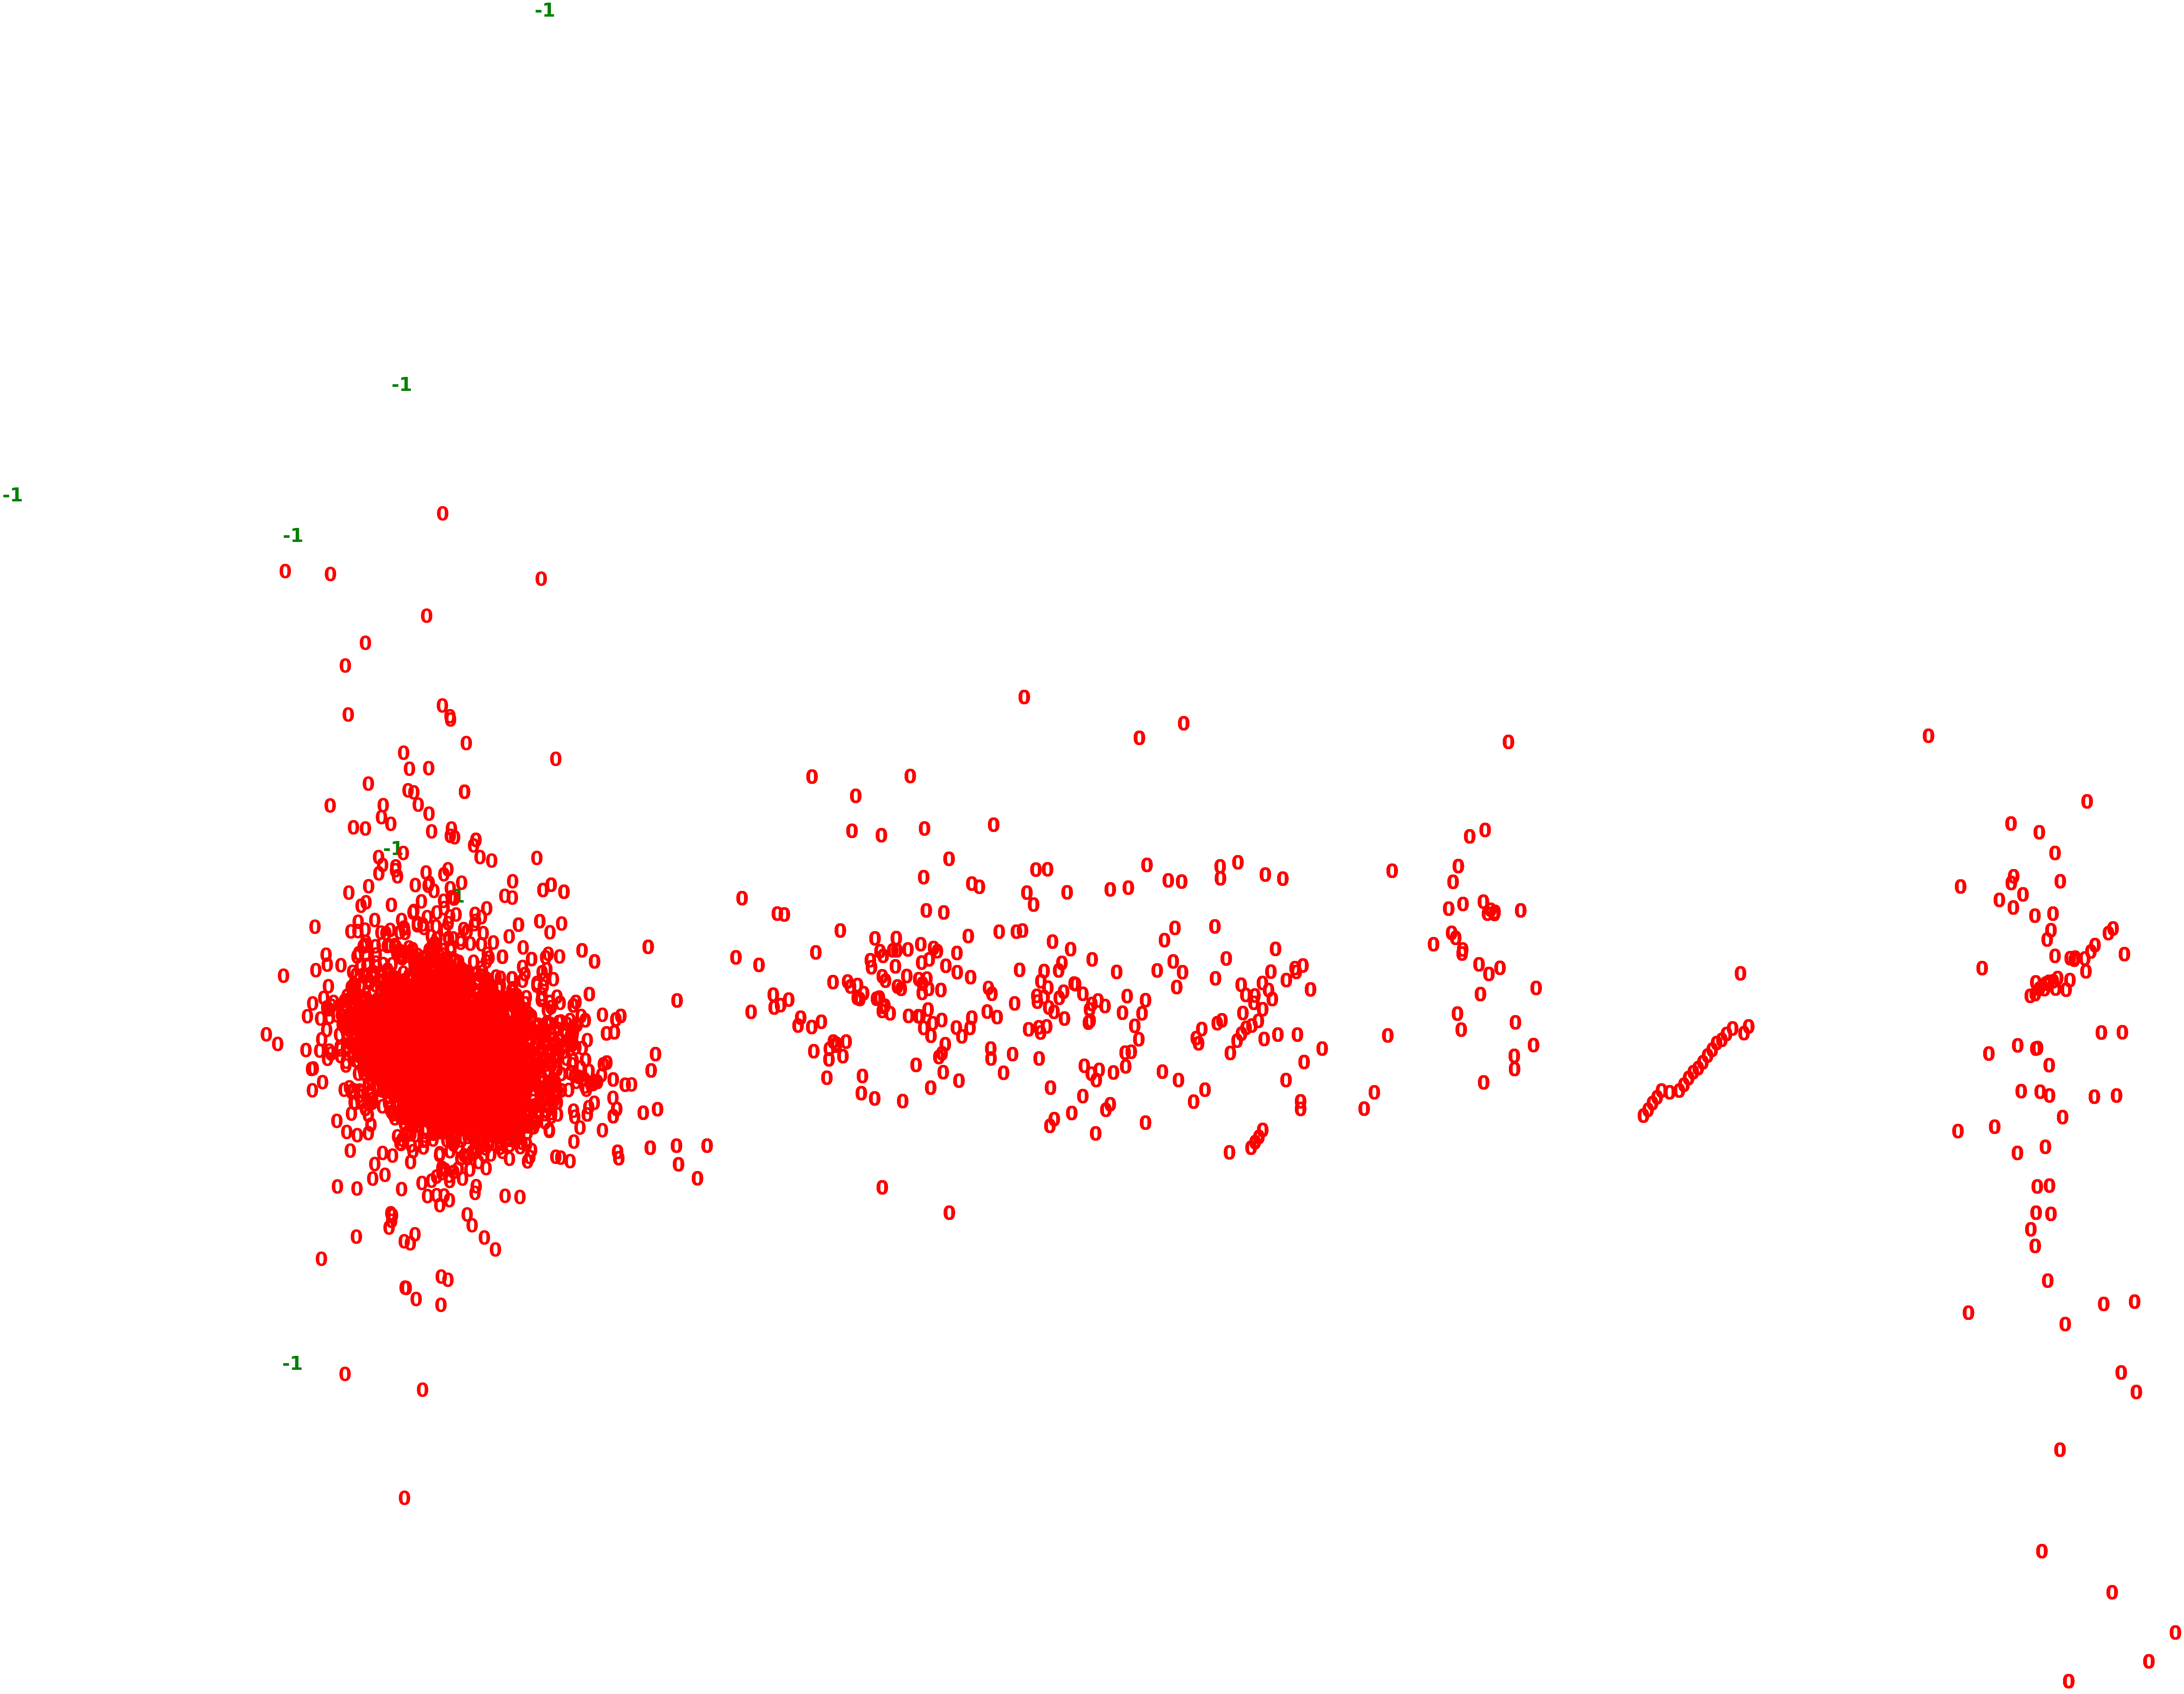

In [91]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(D_labels2[i]),
             color=colours[D_labels2[i]],
             fontdict={'weight': 'bold', 'size': 65}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In our second DBSCAN we see few more noise displayed around our cluster.

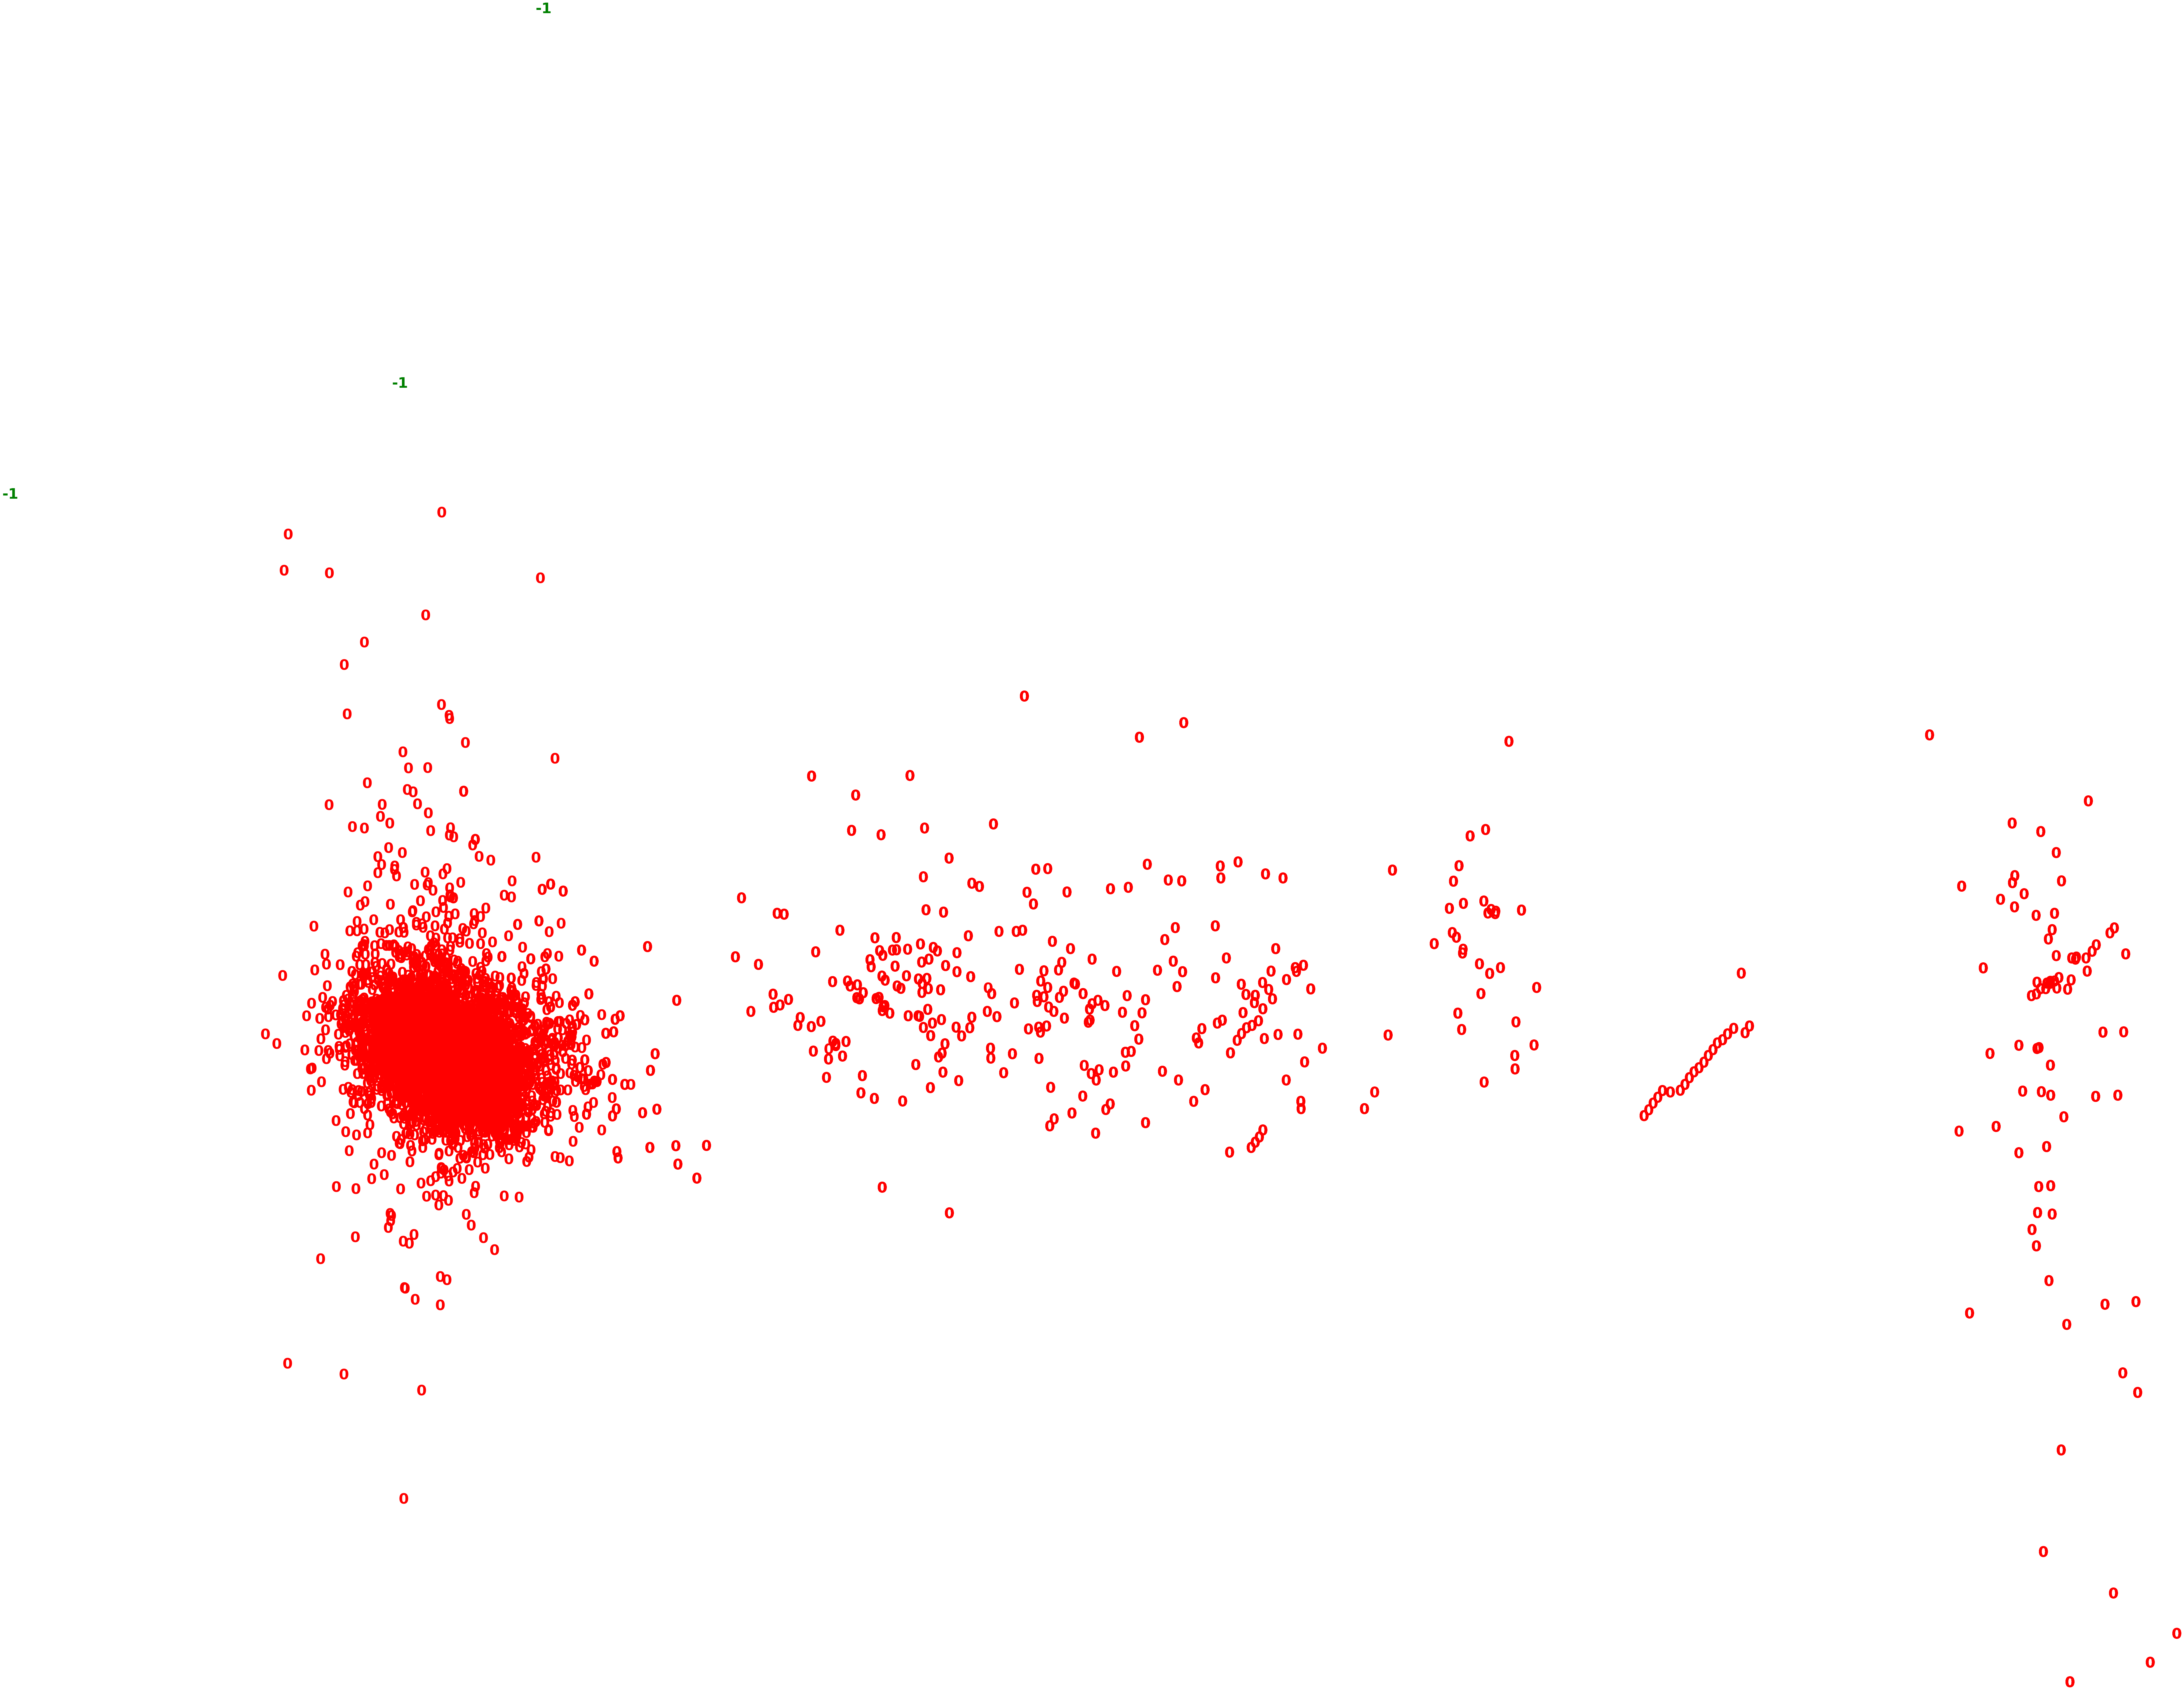

In [90]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(D_labels3[i]),
             color=colours[D_labels3[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The cluster on the far left is heavly densed and the others are spread out. This shows that the dense cluster are normal transactions and the spread out ones are fraud. DBSCAN is better for balanced densed dataset.

# GaussianMixture

In [93]:
from sklearn.mixture import GaussianMixture

G_labels1 = GaussianMixture(n_components=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, G_labels1, metric='euclidean'))

0.30733208841622756


In [94]:
G_labels2 = GaussianMixture(n_components=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, G_labels2, metric='euclidean'))

0.2658471019306217


In [95]:
G_labels3 = GaussianMixture(n_components=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, G_labels3, metric='euclidean'))

0.29926196153996615


According to our GaussianMixture Silhouette score our best is G_labels1 with three components at about 31%

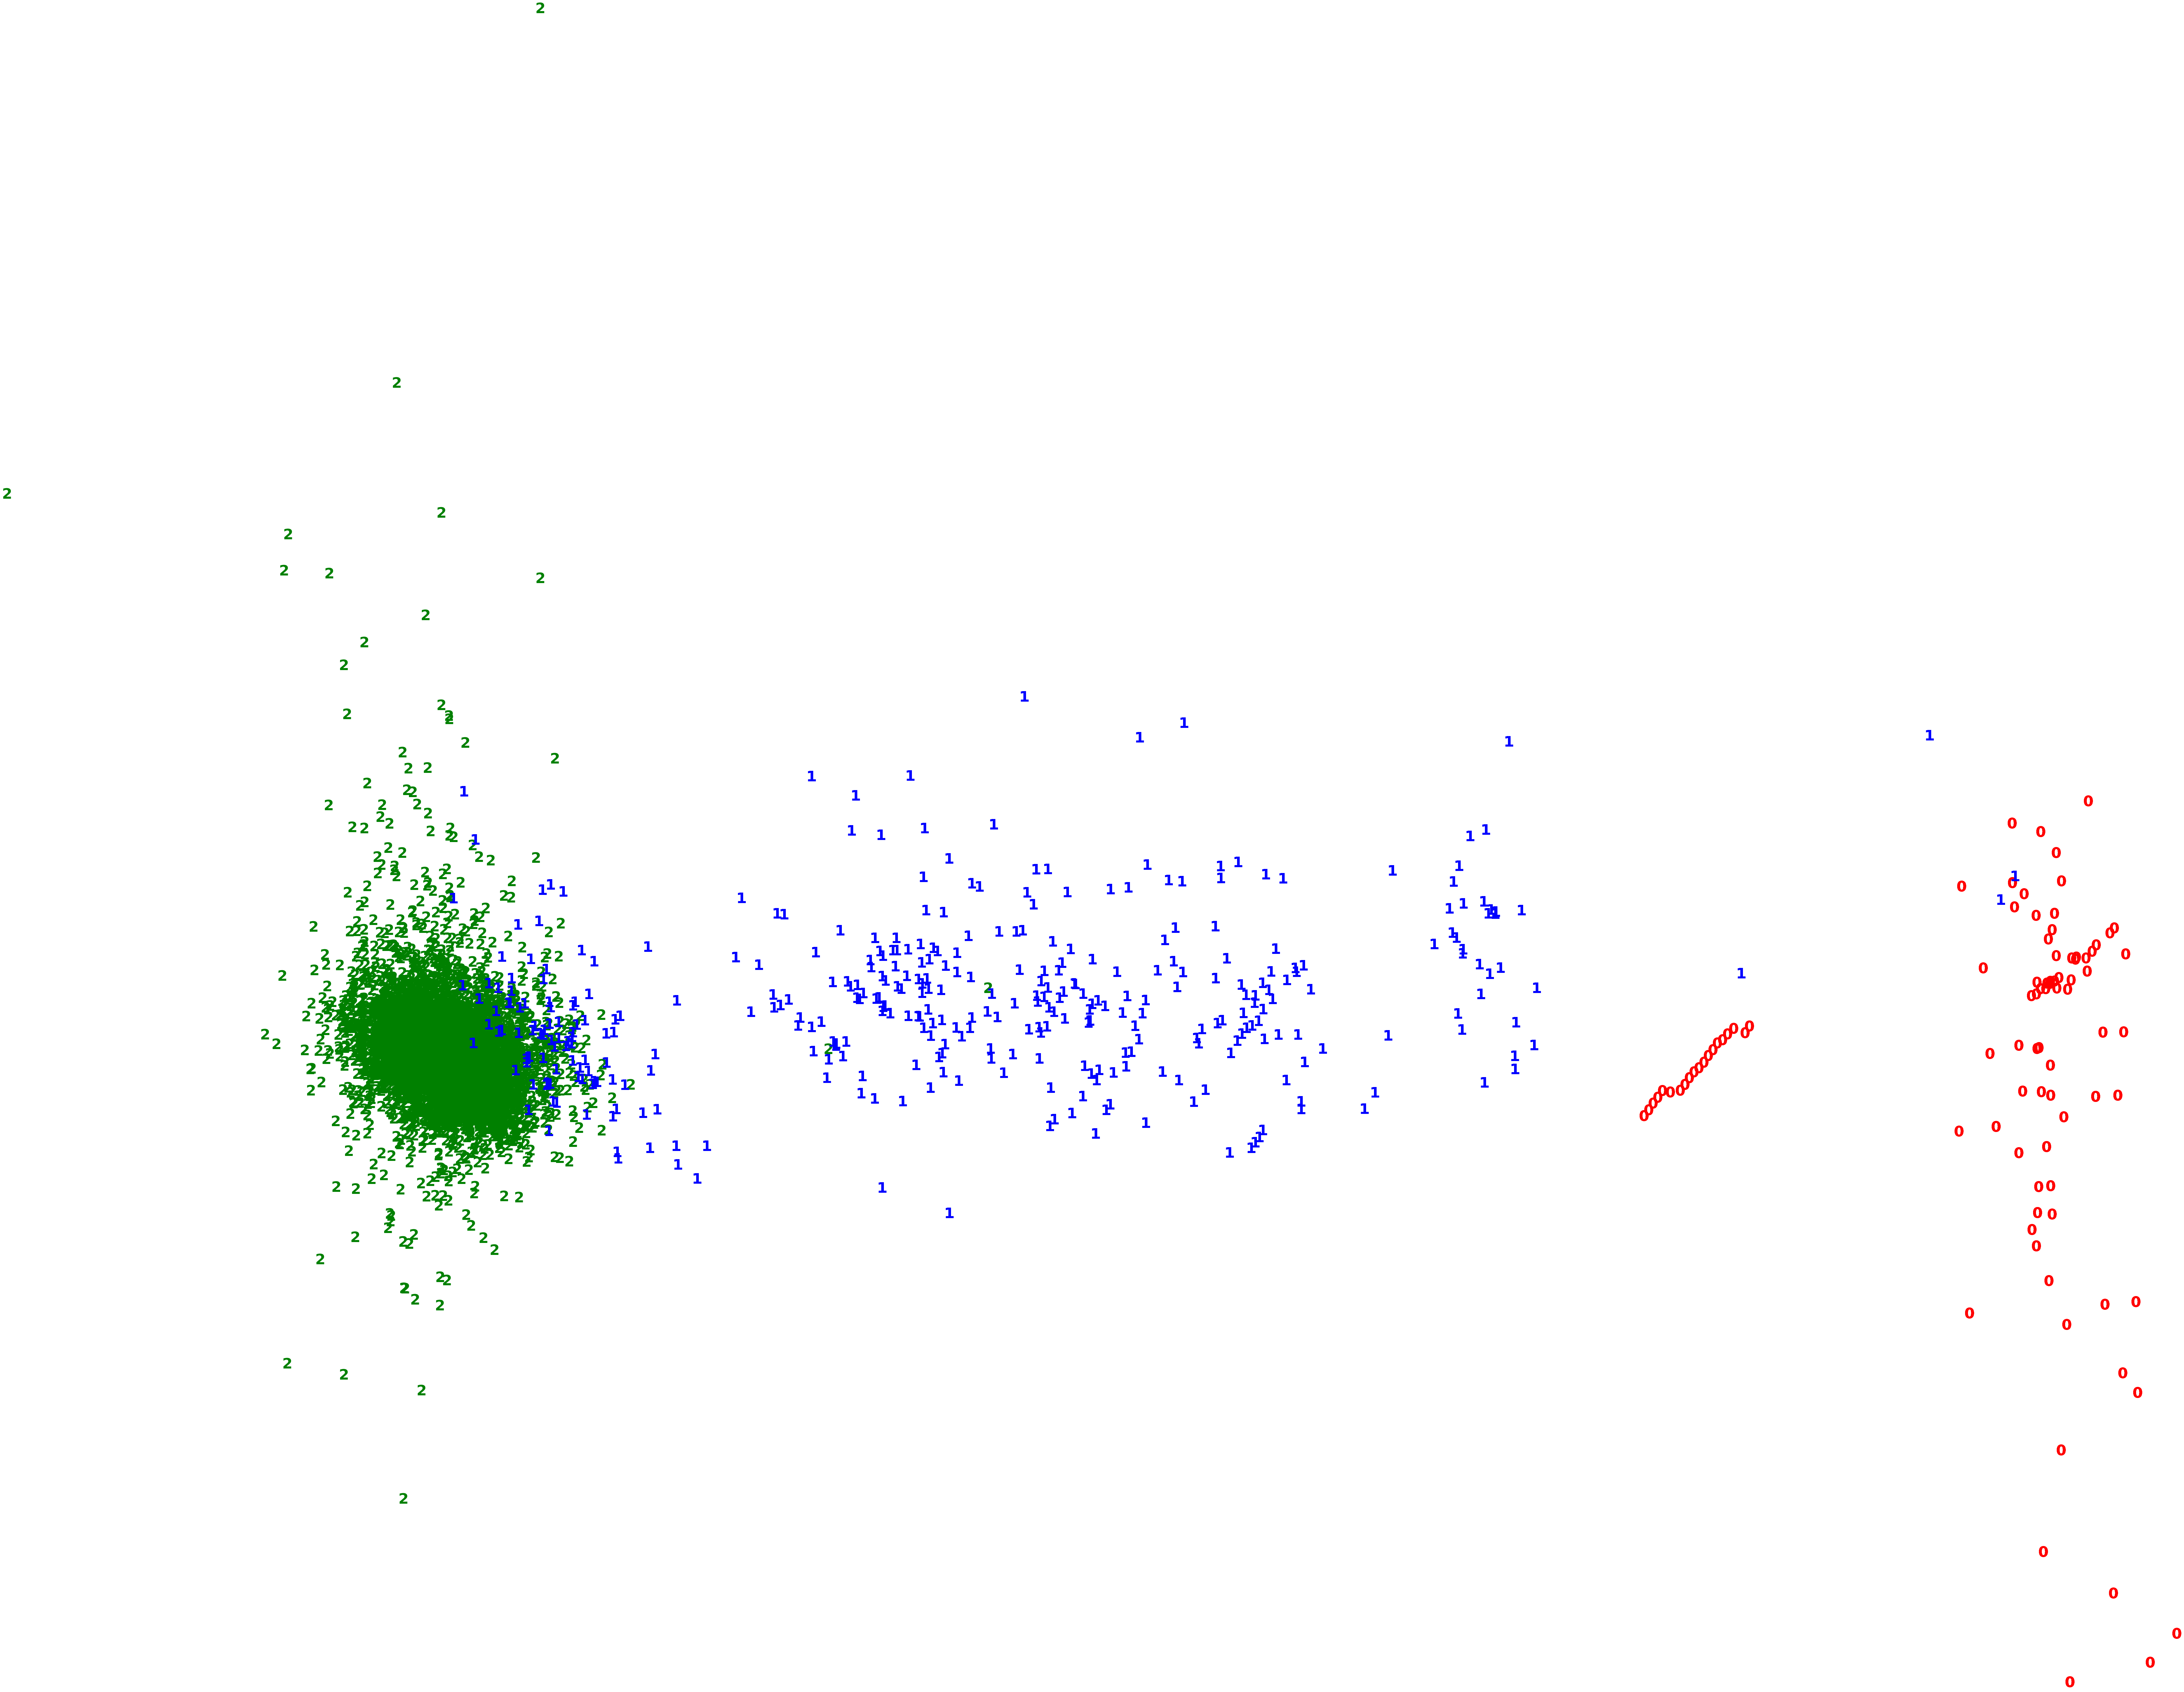

In [96]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(G_labels1[i]),
             color=colours[G_labels1[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

When our GaussianMixture is at 3 components we are able to see the three separate clusters, however the classes are not fully separated. At the left we see green and blue mixing and to the far right we see some blues within red.

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(G_labels2[i]),
             color=colours[G_labels2[i]],
             fontdict={'weight': 'bold', 'size': 7}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We see tha at three components our GaussianMixture performed at 30% which is G_labels1 the best of GaussianMixtures. Comparing all unsupervised models above we know the DBSCAN performed the best so far with a Silhouette score which is about 80% belonging to D_labels4 

# Adding MLP to Decision tree

In [38]:
# Alright! We've done our prep, let's build the model.
# Decision Tree model
from sklearn import tree

dtree_model = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf=2)
dtree_model.fit(X_train, y_train)



# Import the model.
from sklearn.neural_network import MLPClassifier



# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000,))

In [39]:
# Our Multi Level Perceptron scored about 98% this is amazing.
mlp.score(X_train, y_train)

0.9759375

In [40]:
# we see cross validation for MLP average cross val score is 76%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.97864583, 0.96822917, 0.95520833, 0.95885417, 0.96666667])

Scoring about 98%, our decision tree model did very with MLP we can consider using this MLP model for final results.

# Adding MLP to Random Forest Model

In [ ]:
# Adding MLP to Random Forest
# we see cross validation for MLP average cross val score is 76%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

In [42]:
RandomForest_parameters = {
    "n_estimators" :[10,15], 
    "criterion": ["entropy"],
    "max_depth" : [6],
    "min_samples_split":[4],
    "class_weight" : ["balanced_subsample"]}
# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000,))

In [43]:
# Our Multi Level Perceptron scored about 96% this is amazing.
mlp.score(X_train, y_train)

0.9558333333333333

In [44]:
# we see cross validation for MLP average cross val score is 76%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.959375  , 0.96666667, 0.96614583, 0.97395833, 0.95885417])

Random forest scored about 96%. This is impressive and can be considered using, but it did score about 2% lower than the Decision Tree model.

# Adding MLP to our KNN model

In [47]:
# Fitting Kernel Knn model to the Training set
KNeighbors_grid = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
KNeighbors_grid.fit(X_train, y_train)

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000,))

In [49]:
# Our Multi Level Perceptron scored about 99% this is amazing.
mlp.score(X_train, y_train)

0.9860416666666667

In [50]:
# we see cross validation MLP scores and average is about 77%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.9328125 , 0.9765625 , 0.96770833, 0.9765625 , 0.97447917])

The MLP for KNN model scored the highest compared to decision tree and random foerest. KNN MLP outperformed decision tree by 1% and random forest by 3%.

In [100]:
# Import various componenets for model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

# Import the backend
from keras import backend as K

# Convolutional Neural Network (CNN)

In [102]:
X = merged_df.drop('Class', axis = 1)
y = merged_df['Class']

In [103]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state = 42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9600 samples.
Testing set has 2400 samples.


In [104]:
X_train.shape, X_test.shape

((9600, 16), (2400, 16))

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# to prevent overfitting
X_test = scaler.transform(X_test)

In [106]:
# We convert our y dataset the trainig and testing label into numpy array 
import numpy as np
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [107]:
# we have a 2D now we want to convert it to 3D
X_train.shape

(9600, 16)

In [108]:
# Here we change our dataframe to 3D to fit our CNN model. 
# we give our training and testing the same dimensional 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [109]:
# Checking to make sure we have a 3D data
X_train.shape, X_test.shape

((9600, 16, 1), (2400, 16, 1))

# Build CNN

In [110]:
# Below we are building a binary classification 
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# we give dense a single unit that pridects either 1 or 0 
model.add(Dense(1, activation='sigmoid'))

Now we have a model lets predict some digits from data. We will use epochs, effectively iterations of the model, improving based on what it learned previously. Batch size is the number of samples to use in each step improving the model and will affect speed, but also slightly negatively impact accuracy (learning in bigger steps will affect what your model learns).

Note that we are going with 64 perceptron wide layers, this is a random choice. Also that our number of parameters is the product of our input width plus one and our layer width. This reflects the number of weights we're creating in that layer.

In [111]:
model.compile(optimizer=Adam(lr=0.001), 
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [112]:
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.2165 - accuracy: 0.9257 - val_loss: 0.2251 - val_accuracy: 0.9454
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1659 - accuracy: 0.9375 - val_loss: 0.1380 - val_accuracy: 0.9496
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1508 - accuracy: 0.9433 - val_loss: 0.1226 - val_accuracy: 0.9492
Epoch 4/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1414 - accuracy: 0.9453 - val_loss: 0.1127 - val_accuracy: 0.9496
Epoch 5/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1396 - accuracy: 0.9466 - val_loss: 0.1111 - val_accuracy: 0.9558
Epoch 6/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1327 - accuracy: 0.9480 - val_loss: 0.1046 - val_accuracy: 0.9579
Epoch 7/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1308 - accuracy: 0.9502 - val_loss: 0.1034 - val_accuracy: 0.9633
Epoch 

Above in our first epoch we have a training accuracy of 91% with valid accuracy of 93%. As we work our way down our epochs I notice the val_loss starts to decrease thus finishing with training accuracy at about 95% with an accuracy validation at about 97%. The CNN model performed very well.

In [113]:
# checking our model summery
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 15, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

# plot a learning curve

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# plot training and validation accuracy values
def plot_learningCurve(history,epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    #plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()

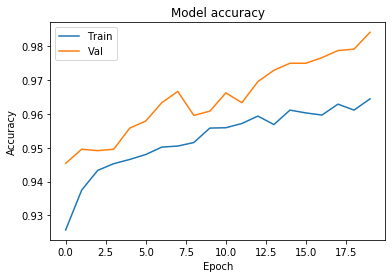

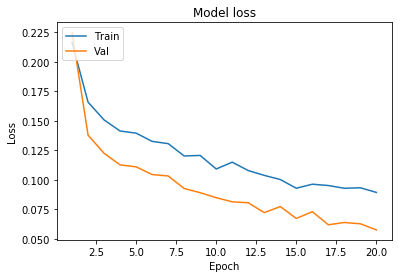

In [115]:
plot_learningCurve(history, epochs)

According to our Model accuracy, training begun around 85% then around 2.5 epoch it jumped to about 94% it gradually goes up. Our validation accuracy started high at 94.5% and it gradually steered up above 96% and at 20 epoch we stop at 98%. This is really well for our accuracy.

As far as model loss we see our training and validation compared they are evenly sloping down and experiencing losses at about the same rate. Around 12.5 epoch we see a small spike in our validation then a spike up around 16 epoch were it isn't consistant with its losses. Overall as we move from epoch 1 through 20 the loss average is around 0.9

# MaxPooling

In [116]:
# Below we are building a binary classification 
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# we give dense a single unit that pridects either 1 or 0 
model.add(Dense(1, activation='sigmoid'))

Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.8981 - val_loss: 0.1883 - val_accuracy: 0.9396
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1953 - accuracy: 0.9284 - val_loss: 0.1484 - val_accuracy: 0.9417
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1766 - accuracy: 0.9328 - val_loss: 0.1411 - val_accuracy: 0.9433
Epoch 4/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9366 - val_loss: 0.1379 - val_accuracy: 0.9450
Epoch 5/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1712 - accuracy: 0.9369 - val_loss: 0.1358 - val_accuracy: 0.9421
Epoch 6/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9378 - val_loss: 0.1325 - val_accuracy: 0.9467
Epoch 7/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1585 - accuracy: 0.9370 - val_loss: 0.1312 - val_accuracy: 0.9488
Epoch 

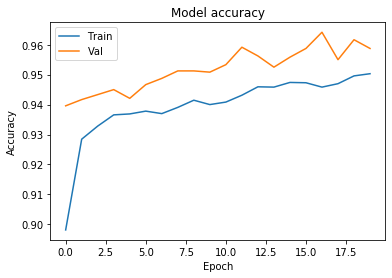

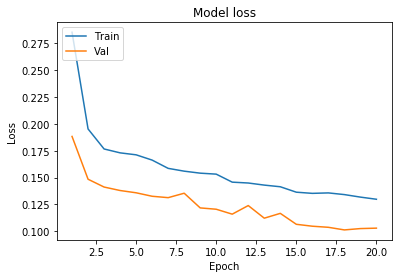

In [117]:
model.compile(optimizer=Adam(lr=0.001), 
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    validation_data=(X_test, y_test),
                    verbose=1)
plot_learningCurve(history, epochs)

Model Accuracy for maxpooling seems to be lower by 3%. We see big spikes downard and upward in our validation set when compared to our training set.  The losses for both train and validation are very much similer however our validation model does have a few tiny spikes which is expected.

In [118]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [137]:
predict = model.predict(X_test)
print(classification_report(y_test, predict.round()))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1236
           1       0.99      0.89      0.94      1164

    accuracy                           0.94      2400
   macro avg       0.95      0.94      0.94      2400
weighted avg       0.95      0.94      0.94      2400



# Summary Analysis

Credit Card Fraud Detection involves monitoring the card transactions using transaction's history based on the ones that turned out to be fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
In this project, we have created accurate fraud detection models that analyzes previous normal activites/spending and time intervals to predict spending amount, time intervals, and behavior. In our project our two classes are Fraud and Normal, Normal has a where we have 492 frauds out of 284,807 transactions. Because or data is heavly unbalanced we upsampled Fraud to 6,000 and downsampled Normal to 6,000 equalling 12,000 samples to get a better prediction. Thus far we've gained insights into the fraud activities via credit card usage through models accuraccy, visualizations, and mapping. This will enable credit companies, credit Detecting team to apply more effort on monitoring customer's current climate, spending history, behavior, and intervals during transactions. What is evident within this analysis is that there are definite patterns to review when detecting fraud activities. 
Credit card fraud analysis can also be viewed as an example of outlier or anomaly detection wheras any unusual pattern(s) that do not conform to expected behavior, will be considered outliers.

Ways to improve: If we could collect new data in this domain a more balanced data containing both normal and fraud transactions would assist the situation, however in reality there are much fewer fraud transactions than normal ones. A bias that might be influencing my analysis is we have an imblance data set. We have 492 frauds out of 284,807 transactions. Without upsampeling fraud and downsampeling normal classes our models would be inaccurate and will not display proper results. Perhaps SVM model would perform better on this dataset, but the fact that it has issues with computing power would be its downfall.


### Supervised Learning Summary
We first apply Supervised Learning starting with Naive Bayes because of its characteristics to perfom well on classification problems. Next we applied Logistic Regression, Decision Tree, Random Forest, and KNN models. Finally all models were tuned using gridSeaech CV. After tuned most did extremely well. In addition we boosted two models, the top three Models that scored the best are Random Forest, and Decision Tree and KNN. According to our classification report Random Forest has a fraud percision of 100% a recall at 97%, accuracy of 99% and an average cross validation score of 98%. We believe Random Forest scored high because our data set is classification based. Random Forest provides higher accuracy and  will handle the missing values and maintain the accuracy of a large proportion of data.
If there are more trees, it won’t allow overfitting trees in the model.

Chosen Model for Project: Random Forest 

### Dimensionality Reduction Summary
The second approach is using powerful dimension technique such as PCA, t-NSE, and UMAP to uncover the shape and patterns of our data.

PCA: We notice PCA is the fasest of the three, by far yet no good visual representation of the data was displayed. 

t-SNE: Our t-SNE model time average of 3 models is about 68.5 seconds for this reason t-SNE is lacking. Even though it captured the local similarity but lacks the total separation of clusters. 

Umap: Five models were ran using Umap and receive an average speed of 27.82 which is over 2x faster than t-SNE and it was able to give us a better visizual of our data separation.
Umap performed the best regarding our dimensionally reduction, speed and visualization.

Best Performer: Umap

### Unpervised Learning Summary
We the applied Supervised Learning Models to our project begining with K-Means, Hierarichical Clustering,DBSCAN and GaussianMixture. 


K-Means: Using the elbow method when we use inertia by identifying the optimial number of clusters. Our elbow method showed 3 clusters is when the elbow is formed. At three clusters K-means Silhouette coefficient is about 36% moreover, it provided the best visualization showing clear separation in classes and clusters and no intertwines.

Hierarichical Clustering: We noticed Linkage Ward provided the best Silhouette score when n_clusters is equal to 2 or 3 at 38% and 36%. Linkage Average has a Silhouette score about 37% when n_clusters is equal to 2. Lastly, Linkage Complete displays a Silhouette score of 38% when n_clusters is 2. Overall we believe Linkage Ward performed better than Linkage Average and Complete. However, it did poor on the visualization aspect failing to do a complete separation between classes.

DBSCAN: scored very well on it's Silhouette Scores, when eps is at 5 and min_samples at 5 we received a 66%, then 75% when eps is at 6 and min_samples at 5, the best score is when eps is at 9 and min_samples remains at 5 we got a 80%. Our visualization shows a very densed cluster for normal transactions. We conclude that DBSCAN is better for a more balanced dataset not our current fraud and normal dataset.

GaussianMixture: Performed best when n_compnents is at 3 with 31% Silhouette score. visualization did not do terrible however we do see some interwines between classes. 

Chosen Model for Project: K- Means

### Multi Level Perceptron Summary

we decided to use 1000 hidden layer size and  apply on our top three supervised Learning models.

Decision Tree: scoring 98% in training with an average five fold cross validation score of 96.8%

Random Forest: in training with a 96% and an average cross validation score of 96.6%

KNN: scoring 99% in training with an average cross validation score of 96.6% tied with the Random Forest cross 
validation score.

Chosen Model for Project: Decision Tree

### Convoluitonal Neural Network Summary

First Model: At 20 epoch  we have a training accuracy at about 95% and a validation at about 97%. According to our learning Curve graph both our training and validation accuracies are performing about the same rate which is perfect. Model loss is also declining at the same rate wit slite changes. The Classification Report shows fraud's percision at 99%, recall at 89% and F1 score at 94% overall good performance. We would select this model over the max pooling model.

Second Model with max pooling: We get a training accuracy of 95% and validation of 96%. Our graph shows model accuracy and model loss are incresing and decling at the same rate. We would not select this model because the previous performed well.

Chosen Model for Project: CNN First Model


In future work, we could strive to improve customer experience on the website by performing customer segmentation. By doing so, we would be able to uncover insightful behavior patterns that can allow us to create a set of personalized systems for each tier of customers. For example, if the customer runs an art and crafts shop, he might be interested in viewing newly released art supplies. This way, the system is able to learn about user perference and allow exposure of new products.



https://www.kaggle.com/mlg-ulb/creditcardfraud

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

https://keras.io/api/layers/

https://www.tensorflow.org/tutorials